### CASE : 
- To do analysis--by utilizing Zillow's housing data and suggest the best real estate zip codes to invest in Ocala Florida today.

### Goal : 
- To Predict the best two ZIPCODES to invest to have assured returns

### Assumption:
- You are an investor with a minimum of $125,000 to deploy upfront.
- Your time horizon for investment is Minimum 3years and Max 10 years (this is not a liquid investment).
- You seek to maximize growth potential by tapping into home value appreciation in"Horse Capital of the World" OCALA
- You are aware that all the returns are subject to future market condition and the investment is going to be a calculated risk.

### Why OCALA:
- Ocala is one of only five cities (four in the US and one in France) permitted under Chamber of Commerce guidelines to use the title, "Horse Capital of the World", based on annual revenue produced by the horse industry
- In the last decades of the twentieth century, the greater Ocala area had one of the highest growth rates in the country for a city its size. 
- There are 30 elementary, ten middle and ten public high schools in Marion County

### Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import datetime
import seaborn as sns
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
import plotly.graph_objects as go

In [2]:
df=pd.read_csv("zillow_data.csv")

In [3]:
df.shape

(14723, 272)

In [4]:
df.head() 

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [6]:
df['City'].value_counts() 

New York          114
Los Angeles        95
Houston            88
San Antonio        48
Washington         45
                 ... 
Flowery Branch      1
Shaker Heights      1
Sunbury             1
Artesia             1
Montverde           1
Name: City, Length: 7554, dtype: int64

#### Getting only null columns

In [7]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
#print(df[df.isnull().any(axis=1)][null_columns].head()) 

Metro      1043
1996-04    1039
1996-05    1039
1996-06    1039
1996-07    1039
1996-08    1039
1996-09    1039
1996-10    1039
1996-11    1039
1996-12    1039
1997-01    1039
1997-02    1039
1997-03    1039
1997-04    1039
1997-05    1039
1997-06    1039
1997-07    1038
1997-08    1038
1997-09    1038
1997-10    1038
1997-11    1038
1997-12    1038
1998-01    1036
1998-02    1036
1998-03    1036
1998-04    1036
1998-05    1036
1998-06    1036
1998-07    1036
1998-08    1036
1998-09    1036
1998-10    1036
1998-11    1036
1998-12    1036
1999-01    1036
1999-02    1036
1999-03    1036
1999-04    1036
1999-05    1036
1999-06    1036
1999-07    1036
1999-08    1036
1999-09    1036
1999-10    1036
1999-11    1036
1999-12    1036
2000-01    1036
2000-02    1036
2000-03    1036
2000-04    1036
2000-05    1036
2000-06    1036
2000-07    1036
2000-08    1036
2000-09    1036
2000-10    1036
2000-11    1036
2000-12    1036
2001-01    1036
2001-02    1036
2001-03    1036
2001-04    1036
2001-05 

#### Dropping all rows with null values in all 272 columns

In [8]:
df= df.dropna(thresh=272) 

In [9]:
df.shape

(12895, 272)

In [10]:
df.isnull().any()

RegionID      False
RegionName    False
City          False
State         False
Metro         False
CountyName    False
SizeRank      False
1996-04       False
1996-05       False
1996-06       False
1996-07       False
1996-08       False
1996-09       False
1996-10       False
1996-11       False
1996-12       False
1997-01       False
1997-02       False
1997-03       False
1997-04       False
1997-05       False
1997-06       False
1997-07       False
1997-08       False
1997-09       False
1997-10       False
1997-11       False
1997-12       False
1998-01       False
1998-02       False
1998-03       False
1998-04       False
1998-05       False
1998-06       False
1998-07       False
1998-08       False
1998-09       False
1998-10       False
1998-11       False
1998-12       False
1999-01       False
1999-02       False
1999-03       False
1999-04       False
1999-05       False
1999-06       False
1999-07       False
1999-08       False
1999-09       False
1999-10       False


##### Observation: City , State, Metro & County Name are four Object based columns

* The data time line is monthly from 1996-Apr to 2018 Apr 
* RegionName column looks like the ZipCode column

#### Finding Number of Unique value for the columns

In [11]:
df.iloc[:,0:8].nunique()

RegionID      12895
RegionName    12895
City           6591
State            50
Metro           642
CountyName      917
SizeRank      12895
1996-04        2700
dtype: int64

In [12]:
df.describe() 

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,12895.000000,12895.000000,12895.000000,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+04,1.289500e+0

##### Working on City column & RegionName(Zip code)

In [13]:
df['City'].value_counts() 

New York         104
Los Angeles       93
Houston           86
San Antonio       48
Washington        43
                ... 
Bensenville        1
Kearneysville      1
Buda               1
Tuttle             1
Montverde          1
Name: City, Length: 6591, dtype: int64

#### Top two cities with maximum ZIPCODES

In [14]:
df_NY = df[df['City'] == 'New York']
df_LA = df[df['City'] == 'Los Angeles']

In [15]:
print(f'{df_NY.RegionName.nunique()} unique Zip Code/s are there in New York.')

104 unique Zip Code/s are there in New York.


In [16]:
print(f'{df_LA.RegionName.nunique()} unique Zip Code/s are there in Los Angelos.')

93 unique Zip Code/s are there in Los Angelos.


In [17]:
df_NY.head() 

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,152400.0,152300.0,152000.0,151800.0,151600.0,151600.0,151700.0,151800.0,151800.0,151900.0,152000.0,152200.0,152400.0,152500.0,152600.0,152700.0,152900.0,153200.0,153800.0,154300.0,154700.0,155200.0,155700.0,156400.0,157000.0,157600.0,158100.0,158600.0,159200.0,160000.0,160900.0,161800.0,162700.0,163700.0,164900.0,166100.0,167300.0,168400.0,169500.0,170700.0,171900.0,173300.0,174900.0,176400.0,178000.0,179600.0,181400.0,183100.0,184800.0,186400.0,187900.0,189400.0,190900.0,192600.0,194300.0,196000.0,197800.0,199600.0,201600.0,203700.0,205800.0,207700.0,209500.0,211400.0,213300.0,215400.0,217500.0,219800.0,222100.0,224500.0,227200.0,229900.0,232400.0,234700.0,236800.0,238800.0,241200.0,243400.0,245200.0,246300.0,247000.0,247200.0,247100.0,247100.0,248100.0,250200.0,252800.0,255300.0,257400.0,259500.0,262300.0,266100.0,270900.0,276000.0,280900.0,285300.0,289000.0,292500.0,296100.0,300200.0,304500.0,309300.0,314200.0,318900.0,323200.0,327400.0,331700.0,336400.0,341400.0,346700.0,352200.0,357800.0,363400.0,368500.0,372200.0,374700.0,376900.0,378800.0,380800.0,383200.0,386000.0,389100.0,392300.0,395200.0,398300.0,401300.0,403400.0,404900.0,407300.0,410100.0,412600.0,414000.0,413900.0,412800.0,411000.0,408900.0,407900.0,407700.0,406200.0,403400.0,400800.0,398300.0,395900.0,392800.0,388300.0,383000.0,377500.0,371800.0,367100.0,363000.0,357400.0,350500.0,344200.0,338500.0,333000.0,328100.0,324300.0,322400.0,321900.0,322200.0,324200.0,327100.0,328100.0,327000.0,326000.0,326300.0,327300.0,330100.0,334100.0,335000.0,333200.0,331700.0,321900.0,310500.0,310900.0,320000.0,324600.0,324500.0,320600.0,315900.0,312700.0,311600.0,311100.0,310800.0,311800.0,310600.0,306400.0,301300.0,298300.0,295200.0,294700.0,297300.0,299100.0,298100.0,296800

In [18]:
df_LA.head() 

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
30,96027,90046,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,31,340600.0,341700.0,343000.0,344400.0,346100.0,348000.0,350300.0,353000.0,356400.0,360400.0,364400.0,368200.0,372300.0,376500.0,381100.0,385800.0,390900.0,396200.0,402000.0,408200.0,415100.0,422400.0,429400.0,435900.0,442200.0,448000.0,453600.0,458800.0,463800.0,468600.0,473500.0,478400.0,483600.0,489100.0,494300.0,498800.0,503200.0,507400.0,511700.0,515900.0,520200.0,524600.0,529400.0,534500.0,540000.0,546000.0,551700.0,556300.0,560300.0,563800.0,566800.0,569200.0,571300.0,573300.0,575400.0,577800.0,580700.0,584100.0,587500.0,590200.0,592500.0,594500.0,596400.0,598200.0,600000.0,602300.0,605500.0,609600.0,614800.0,621000.0,628000.0,635100.0,642700.0,650700.0,659500.0,668900.0,678800.0,689400.0,700700.0,713800.0,727400.0,739200.0,749300.0,759900.0,770500.0,781200.0,792500.0,804900.0,818000.0,830800.0,843000.0,854100.0,865200.0,877400.0,891900.0,908900.0,928400.0,948900.0,969400.0,990100.0,1011500.0,1034200.0,1057800.0,1080800.0,1103000.0,1124700.0,1147000.0,1171400.0,1199400.0,1230400.0,1263200.0,1294700.0,1322000.0,1344800.0,1363100.0,1376500.0,1386600.0,1395500.0,1403800.0,1411100.0,1415900.0,1418200.0,1418900.0,1417400.0,1413300.0,1409200.0,1406300.0,1404100.0,1403200.0,1403000.0,1401200.0,1396000.0,1386900.0,1375700.0,1364700.0,1353200.0,1340700.0,1329700.0,1319500.0,1308800.0,1298200.0,1288400.0,1278000.0,1265300.0,1248300.0,1229400.0,1211700.0,1197600.0,1187700.0,1182200.0,1177700.0,1172300.0,1167000.0,1162900.0,1158700.0,1152800.0,1143300.0,1131100.0,1122900.0,1122900.0,1128800.0,1137400.0,1145400.0,1149900.0,1152500.0,1155200.0,1156900.0,1156500.0,1159100.0,1159900.0,1152200.0,1142700.0,1139400.0,1130300.0,1116700.0,1103400.0,1093500.0,1082800.0,1068700.0,1054200.0,1044600.0,1039900.0,1036000.0,1023800.0,100060

### Ocala_EDA

In [19]:
df_Ocala= df[df['City'] == 'Ocala']

In [20]:
print(f'{df_Ocala.RegionName.nunique()} unique Zip Code/s are there in Ocala.')

9 unique Zip Code/s are there in Ocala.


In [21]:
df_Ocala.head(10) 

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
3447,73118,34472,Ocala,FL,Ocala,Marion,3448,56400.0,57100.0,57700.0,58100.0,58400.0,58500.0,58500.0,58400.0,58400.0,58500.0,58600.0,58700.0,58800.0,59100.0,59400.0,59700.0,60100.0,60400.0,60700.0,60800.0,60900.0,61000.0,61100.0,61000.0,61000.0,61100.0,61400.0,61800.0,62300.0,62900.0,63400.0,63900.0,64500.0,65300.0,66200.0,66800.0,67100.0,67100.0,66800.0,66000.0,64800.0,63600.0,62300.0,61100.0,60000.0,59300.0,58800.0,58400.0,58100.0,57800.0,57600.0,57500.0,57500.0,57500.0,57600.0,57800.0,58100.0,58500.0,59100.0,59600.0,60100.0,60400.0,60700.0,61000.0,61400.0,61900.0,62400.0,62900.0,63500.0,64200.0,65000.0,65900.0,66600.0,67100.0,67600.0,68000.0,68500.0,69000.0,69600.0,70800.0,72200.0,72200.0,70800.0,69500.0,68700.0,68500.0,68700.0,69300.0,70100.0,71300.0,72600.0,73800.0,74800.0,75900.0,77400.0,79100.0,80800.0,82500.0,84200.0,85900.0,87600.0,89200.0,91000.0,92600.0,94500.0,96800.0,99200.0,101700.0,104500.0,107700.0,111600.0,116100.0,121000.0,126000.0,130600.0,134600.0,138200.0,141800.0,145400.0,149400.0,153200.0,156400.0,158700.0,160300.0,161000.0,161100.0,160600.0,159900.0,159000.0,158200.0,157400.0,156800.0,156300.0,155400.0,153800.0,152100.0,150400.0,148700.0,146800.0,144800.0,142600.0,140200.0,137600.0,135000.0,132500.0,129700.0,126600.0,123900.0,121600.0,119600.0,117400.0,115300.0,113200.0,111200.0,109000.0,107100.0,105300.0,103400.0,101100.0,98700.0,96200.0,93600.0,90900.0,88500.0,86700.0,85500.0,85200.0,83900.0,81700.0,80100.0,79100.0,77600.0,76000.0,75000.0,74800.0,74500.0,73700.0,73300.0,73200.0,72500.0,71100.0,70000.0,69900.0,70100.0,69800.0,69300.0,68800.0,68700.0,69000.0,69200.0,69400.0,70300.0,71700.0,72600.0,72700.0,72800.0,73100.0,73500.0,74100.0,75000.0,75600.0,75700.0,75300.0,75200.0,75400.0,75900.0,77000.0,78300.0,79400.0,80100.0,80700.0,81400.0,82100.0,82300.0,82000.0,81900.

In [22]:
df_Ocala.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 3447 to 7832
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 19.2+ KB


In [23]:
def show_distplot(dataframe, RegionName, column_name):
    sns.distplot(dataframe[column_name])
    plt.title(f'{RegionName} {column_name}')

In [24]:
df['1996-04'].min()

11400.0

In [25]:
df_Ocala['1996-04'].min()

43000.0

In [26]:
df['1996-04'].max()

3676700.0

In [27]:
df_Ocala['1996-04'].max()

81300.0

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



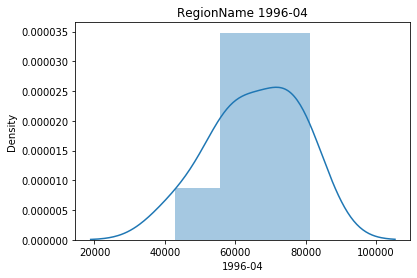

In [28]:
show_distplot(df_Ocala, 'RegionName', '1996-04')

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



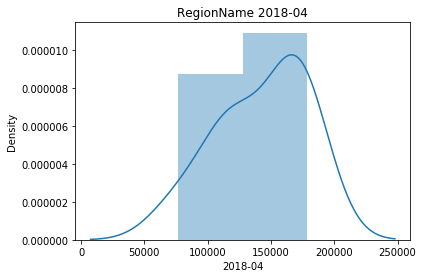

In [29]:
show_distplot(df_Ocala, 'RegionName', '2018-04')

Text(0.5, 1.0, 'LA by Region')

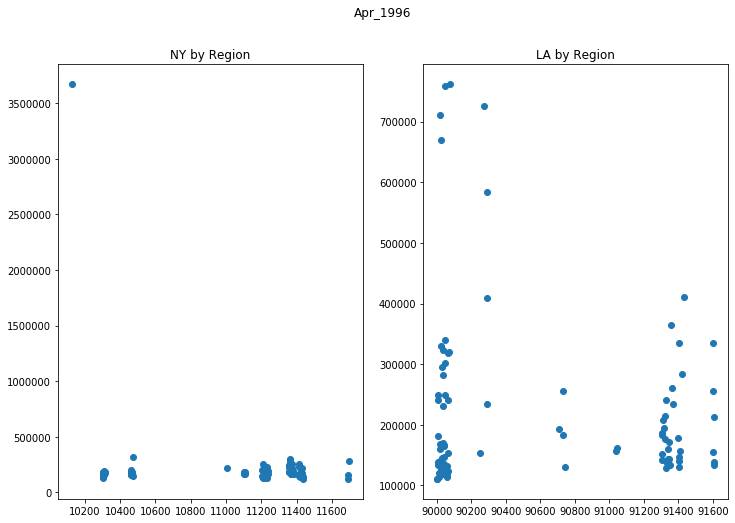

In [30]:
fig = plt.figure(figsize = (12, 8))
fig.suptitle('Apr_1996')

ax1 = plt.subplot(1, 2, 1) # just changed name of axis from ax1 to ax2 and plt number from 1 to 2
plt.scatter(df_NY['RegionName'], df_NY['1996-04'])
ax1.set_title('NY by Region')

ax2 = plt.subplot(1, 2, 2) # just changed name of axis from ax2 to ax3 and plt number from 2 to 3
plt.scatter(df_LA['RegionName'], df_LA['1996-04'])
ax2.set_title('LA by Region')

In [31]:
list(df_Ocala.columns)

['RegionID',
 'RegionName',
 'City',
 'State',
 'Metro',
 'CountyName',
 'SizeRank',
 '1996-04',
 '1996-05',
 '1996-06',
 '1996-07',
 '1996-08',
 '1996-09',
 '1996-10',
 '1996-11',
 '1996-12',
 '1997-01',
 '1997-02',
 '1997-03',
 '1997-04',
 '1997-05',
 '1997-06',
 '1997-07',
 '1997-08',
 '1997-09',
 '1997-10',
 '1997-11',
 '1997-12',
 '1998-01',
 '1998-02',
 '1998-03',
 '1998-04',
 '1998-05',
 '1998-06',
 '1998-07',
 '1998-08',
 '1998-09',
 '1998-10',
 '1998-11',
 '1998-12',
 '1999-01',
 '1999-02',
 '1999-03',
 '1999-04',
 '1999-05',
 '1999-06',
 '1999-07',
 '1999-08',
 '1999-09',
 '1999-10',
 '1999-11',
 '1999-12',
 '2000-01',
 '2000-02',
 '2000-03',
 '2000-04',
 '2000-05',
 '2000-06',
 '2000-07',
 '2000-08',
 '2000-09',
 '2000-10',
 '2000-11',
 '2000-12',
 '2001-01',
 '2001-02',
 '2001-03',
 '2001-04',
 '2001-05',
 '2001-06',
 '2001-07',
 '2001-08',
 '2001-09',
 '2001-10',
 '2001-11',
 '2001-12',
 '2002-01',
 '2002-02',
 '2002-03',
 '2002-04',
 '2002-05',
 '2002-06',
 '2002-07',
 '2

In [32]:
for x in list(df_Ocala.columns)[2:]:
    print(x)

City
State
Metro
CountyName
SizeRank
1996-04
1996-05
1996-06
1996-07
1996-08
1996-09
1996-10
1996-11
1996-12
1997-01
1997-02
1997-03
1997-04
1997-05
1997-06
1997-07
1997-08
1997-09
1997-10
1997-11
1997-12
1998-01
1998-02
1998-03
1998-04
1998-05
1998-06
1998-07
1998-08
1998-09
1998-10
1998-11
1998-12
1999-01
1999-02
1999-03
1999-04
1999-05
1999-06
1999-07
1999-08
1999-09
1999-10
1999-11
1999-12
2000-01
2000-02
2000-03
2000-04
2000-05
2000-06
2000-07
2000-08
2000-09
2000-10
2000-11
2000-12
2001-01
2001-02
2001-03
2001-04
2001-05
2001-06
2001-07
2001-08
2001-09
2001-10
2001-11
2001-12
2002-01
2002-02
2002-03
2002-04
2002-05
2002-06
2002-07
2002-08
2002-09
2002-10
2002-11
2002-12
2003-01
2003-02
2003-03
2003-04
2003-05
2003-06
2003-07
2003-08
2003-09
2003-10
2003-11
2003-12
2004-01
2004-02
2004-03
2004-04
2004-05
2004-06
2004-07
2004-08
2004-09
2004-10
2004-11
2004-12
2005-01
2005-02
2005-03
2005-04
2005-05
2005-06
2005-07
2005-08
2005-09
2005-10
2005-11
2005-12
2006-01
2006-02
2006-03
200

#### Finding Min & Max value for Ocala each Year

In [33]:
min_dict = {}
for x in list(df_Ocala.columns)[1:]:
    min_dict[x] = df_Ocala[x].min() 

In [34]:
min_dict

{'RegionName': 34470,
 'City': 'Ocala',
 'State': 'FL',
 'Metro': 'Ocala',
 'CountyName': 'Marion',
 'SizeRank': 3448,
 '1996-04': 43000.0,
 '1996-05': 43200.0,
 '1996-06': 43300.0,
 '1996-07': 43400.0,
 '1996-08': 43400.0,
 '1996-09': 43400.0,
 '1996-10': 43500.0,
 '1996-11': 43600.0,
 '1996-12': 43900.0,
 '1997-01': 44300.0,
 '1997-02': 44700.0,
 '1997-03': 45000.0,
 '1997-04': 45300.0,
 '1997-05': 45500.0,
 '1997-06': 45600.0,
 '1997-07': 45600.0,
 '1997-08': 45600.0,
 '1997-09': 45600.0,
 '1997-10': 45700.0,
 '1997-11': 46000.0,
 '1997-12': 46400.0,
 '1998-01': 47000.0,
 '1998-02': 47500.0,
 '1998-03': 48000.0,
 '1998-04': 48500.0,
 '1998-05': 48900.0,
 '1998-06': 49200.0,
 '1998-07': 49400.0,
 '1998-08': 49600.0,
 '1998-09': 49800.0,
 '1998-10': 50000.0,
 '1998-11': 50400.0,
 '1998-12': 50900.0,
 '1999-01': 51500.0,
 '1999-02': 52100.0,
 '1999-03': 52600.0,
 '1999-04': 53000.0,
 '1999-05': 53100.0,
 '1999-06': 53100.0,
 '1999-07': 52900.0,
 '1999-08': 52600.0,
 '1999-09': 52200.0,

In [35]:
max_dict = {}
for x in list(df_Ocala.columns)[1:]:
    max_dict[x] = df_Ocala[x].max() 

In [36]:
max_dict

{'RegionName': 34482,
 'City': 'Ocala',
 'State': 'FL',
 'Metro': 'Ocala',
 'CountyName': 'Marion',
 'SizeRank': 7833,
 '1996-04': 81300.0,
 '1996-05': 81400.0,
 '1996-06': 81500.0,
 '1996-07': 81700.0,
 '1996-08': 82000.0,
 '1996-09': 82300.0,
 '1996-10': 82700.0,
 '1996-11': 83100.0,
 '1996-12': 83500.0,
 '1997-01': 83800.0,
 '1997-02': 84200.0,
 '1997-03': 84500.0,
 '1997-04': 84700.0,
 '1997-05': 85000.0,
 '1997-06': 85200.0,
 '1997-07': 85400.0,
 '1997-08': 85500.0,
 '1997-09': 85600.0,
 '1997-10': 85700.0,
 '1997-11': 85800.0,
 '1997-12': 86000.0,
 '1998-01': 86200.0,
 '1998-02': 86500.0,
 '1998-03': 86900.0,
 '1998-04': 87300.0,
 '1998-05': 87900.0,
 '1998-06': 88600.0,
 '1998-07': 89500.0,
 '1998-08': 90500.0,
 '1998-09': 91700.0,
 '1998-10': 93000.0,
 '1998-11': 94300.0,
 '1998-12': 95800.0,
 '1999-01': 97300.0,
 '1999-02': 98800.0,
 '1999-03': 100600.0,
 '1999-04': 102300.0,
 '1999-05': 103900.0,
 '1999-06': 105100.0,
 '1999-07': 106300.0,
 '1999-08': 107300.0,
 '1999-09': 10

#### Dropping Columns for testing df_Ocala

In [37]:
df_Ocala=df_Ocala.drop(["RegionID", "City", "State", "Metro", "CountyName", "SizeRank"], axis=1)

In [38]:
df_Ocala.head() 

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
3447,34472,56400.0,57100.0,57700.0,58100.0,58400.0,58500.0,58500.0,58400.0,58400.0,58500.0,58600.0,58700.0,58800.0,59100.0,59400.0,59700.0,60100.0,60400.0,60700.0,60800.0,60900.0,61000.0,61100.0,61000.0,61000.0,61100.0,61400.0,61800.0,62300.0,62900.0,63400.0,63900.0,64500.0,65300.0,66200.0,66800.0,67100.0,67100.0,66800.0,66000.0,64800.0,63600.0,62300.0,61100.0,60000.0,59300.0,58800.0,58400.0,58100.0,57800.0,57600.0,57500.0,57500.0,57500.0,57600.0,57800.0,58100.0,58500.0,59100.0,59600.0,60100.0,60400.0,60700.0,61000.0,61400.0,61900.0,62400.0,62900.0,63500.0,64200.0,65000.0,65900.0,66600.0,67100.0,67600.0,68000.0,68500.0,69000.0,69600.0,70800.0,72200.0,72200.0,70800.0,69500.0,68700.0,68500.0,68700.0,69300.0,70100.0,71300.0,72600.0,73800.0,74800.0,75900.0,77400.0,79100.0,80800.0,82500.0,84200.0,85900.0,87600.0,89200.0,91000.0,92600.0,94500.0,96800.0,99200.0,101700.0,104500.0,107700.0,111600.0,116100.0,121000.0,126000.0,130600.0,134600.0,138200.0,141800.0,145400.0,149400.0,153200.0,156400.0,158700.0,160300.0,161000.0,161100.0,160600.0,159900.0,159000.0,158200.0,157400.0,156800.0,156300.0,155400.0,153800.0,152100.0,150400.0,148700.0,146800.0,144800.0,142600.0,140200.0,137600.0,135000.0,132500.0,129700.0,126600.0,123900.0,121600.0,119600.0,117400.0,115300.0,113200.0,111200.0,109000.0,107100.0,105300.0,103400.0,101100.0,98700.0,96200.0,93600.0,90900.0,88500.0,86700.0,85500.0,85200.0,83900.0,81700.0,80100.0,79100.0,77600.0,76000.0,75000.0,74800.0,74500.0,73700.0,73300.0,73200.0,72500.0,71100.0,70000.0,69900.0,70100.0,69800.0,69300.0,68800.0,68700.0,69000.0,69200.0,69400.0,70300.0,71700.0,72600.0,72700.0,72800.0,73100.0,73500.0,74100.0,75000.0,75600.0,75700.0,75300.0,75200.0,75400.0,75900.0,77000.0,78300.0,79400.0,80100.0,80700.0,81400.0,82100.0,82300.0,82000.0,81900.0,82200.0,82500.0,82700.0,83100,83400,83600,83900,83700,83700,84000,84400,84600

#### Renaming RegionName to Zipcode

In [39]:
df_Ocala.rename(columns={'RegionName': 'Zipcode'}, inplace=True)
df_Ocala.head()

,Zipcode,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
3447,34472,56400.0,57100.0,57700.0,58100.0,58400.0,58500.0,58500.0,58400.0,58400.0,58500.0,58600.0,58700.0,58800.0,59100.0,59400.0,59700.0,60100.0,60400.0,60700.0,60800.0,60900.0,61000.0,61100.0,61000.0,61000.0,61100.0,61400.0,61800.0,62300.0,62900.0,63400.0,63900.0,64500.0,65300.0,66200.0,66800.0,67100.0,67100.0,66800.0,66000.0,64800.0,63600.0,62300.0,61100.0,60000.0,59300.0,58800.0,58400.0,58100.0,57800.0,57600.0,57500.0,57500.0,57500.0,57600.0,57800.0,58100.0,58500.0,59100.0,59600.0,60100.0,60400.0,60700.0,61000.0,61400.0,61900.0,62400.0,62900.0,63500.0,64200.0,65000.0,65900.0,66600.0,67100.0,67600.0,68000.0,68500.0,69000.0,69600.0,70800.0,72200.0,72200.0,70800.0,69500.0,68700.0,68500.0,68700.0,69300.0,70100.0,71300.0,72600.0,73800.0,74800.0,75900.0,77400.0,79100.0,80800.0,82500.0,84200.0,85900.0,87600.0,89200.0,91000.0,92600.0,94500.0,96800.0,99200.0,101700.0,104500.0,107700.0,111600.0,116100.0,121000.0,126000.0,130600.0,134600.0,138200.0,141800.0,145400.0,149400.0,153200.0,156400.0,158700.0,160300.0,161000.0,161100.0,160600.0,159900.0,159000.0,158200.0,157400.0,156800.0,156300.0,155400.0,153800.0,152100.0,150400.0,148700.0,146800.0,144800.0,142600.0,140200.0,137600.0,135000.0,132500.0,129700.0,126600.0,123900.0,121600.0,119600.0,117400.0,115300.0,113200.0,111200.0,109000.0,107100.0,105300.0,103400.0,101100.0,98700.0,96200.0,93600.0,90900.0,88500.0,86700.0,85500.0,85200.0,83900.0,81700.0,80100.0,79100.0,77600.0,76000.0,75000.0,74800.0,74500.0,73700.0,73300.0,73200.0,72500.0,71100.0,70000.0,69900.0,70100.0,69800.0,69300.0,68800.0,68700.0,69000.0,69200.0,69400.0,70300.0,71700.0,72600.0,72700.0,72800.0,73100.0,73500.0,74100.0,75000.0,75600.0,75700.0,75300.0,75200.0,75400.0,75900.0,77000.0,78300.0,79400.0,80100.0,80700.0,81400.0,82100.0,82300.0,82000.0,81900.0,82200.0,82500.0,82700.0,83100,83400,83600,83900,83700,83700,84000,84400,84600,85

#### Reseting Index

In [40]:
df_Ocala.set_index('Zipcode', inplace=True)

In [41]:
df_Ocala.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 34472 to 34475
Columns: 265 entries, 1996-04 to 2018-04
dtypes: float64(219), int64(46)
memory usage: 18.7 KB


#### Testing the Transpose Feature Dates to Row

In [42]:
df_Ocala=df_Ocala.transpose()
df_Ocala.head() 

Zipcode,34472,34471,34476,34470,34482,34480,34474,34479,34475
1996-04,56400.0,81300.0,72200.0,59400.0,66900.0,77900.0,76000.0,58100.0,43000.0
1996-05,57100.0,81400.0,73400.0,59700.0,68000.0,78100.0,76600.0,58300.0,43200.0
1996-06,57700.0,81500.0,74500.0,59900.0,68800.0,78300.0,77100.0,58400.0,43300.0
1996-07,58100.0,81700.0,75200.0,60200.0,69600.0,78600.0,77500.0,58500.0,43400.0
1996-08,58400.0,82000.0,75800.0,60300.0,70100.0,78900.0,77800.0,58600.0,43400.0


In [43]:
df_Ocala.describe() 

Zipcode,34472,34471,34476,34470,34482,34480,34474,34479,34475
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,87843.773585,139155.094340,130906.415094,92711.320755,132369.811321,129782.264151,141436.981132,87138.490566,62389.811321
std,28886.964413,37605.235956,39912.359439,27278.585649,40441.109377,35389.562890,38527.669002,25941.876129,18771.949021
min,56400.000000,81300.000000,71300.000000,59400.000000,66900.000000,77900.000000,76000.000000,58100.000000,43000.000000
25%,66000.000000,113400.000000,105700.000000,75400.000000,108200.000000,104500.000000,119300.000000,70100.000000,49800.000000
50%,79100.000000,133000.000000,123600.000000,81600.000000,126700.000000,121500.000000,132800.000000,76600.000000,53300.000000
75%,103400.000000,162000.000000,149700.000000,104300.000000,149900.000000,148600.000000,162100.000000,97700.000000,68900.000000
max,161100.000000,231600.000000,231200.000000,163800.000000,228300.000000,220000.000000,230400.000000,156200.000000,110000.000000


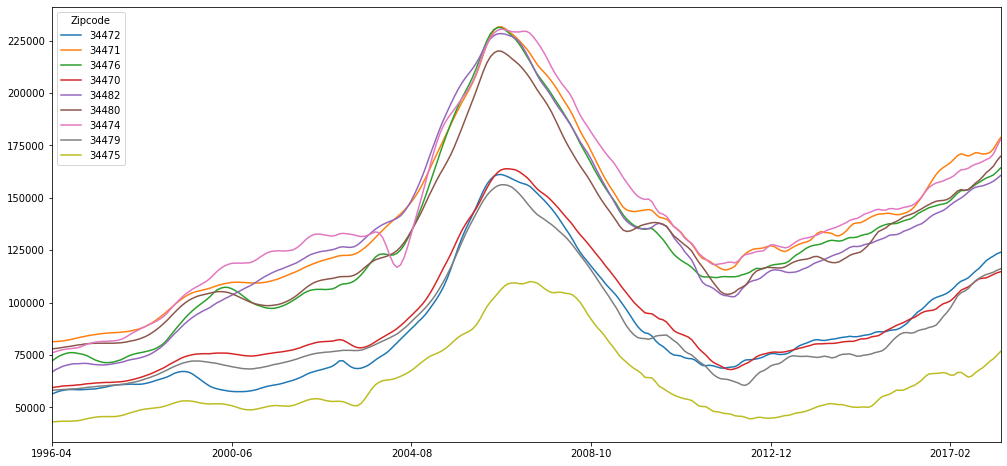

In [44]:
df_Ocala.plot(figsize=(17,8))

#### Observation : Evidently this time series df_Ocala is not stationary in nature

#### Zipcodes with Top 5 Mean 

In [45]:
Ocala_mean = df_Ocala.mean()

In [46]:
Ocala_mean.head(10) 

Zipcode
34472     87843.773585
34471    139155.094340
34476    130906.415094
34470     92711.320755
34482    132369.811321
34480    129782.264151
34474    141436.981132
34479     87138.490566
34475     62389.811321
dtype: float64

In [47]:
Ocala_mean.nlargest() 

Zipcode
34474    141436.981132
34471    139155.094340
34482    132369.811321
34476    130906.415094
34480    129782.264151
dtype: float64

#### Converting index to datetime 

In [48]:
df_Ocala.index=pd.to_datetime(df_Ocala.index)
df_Ocala.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 9 columns):
34472    265 non-null float64
34471    265 non-null float64
34476    265 non-null float64
34470    265 non-null float64
34482    265 non-null float64
34480    265 non-null float64
34474    265 non-null float64
34479    265 non-null float64
34475    265 non-null float64
dtypes: float64(9)
memory usage: 20.7 KB


#### Converting column names to string

In [49]:
df_Ocala.columns = df_Ocala.columns.astype(str)

### Dickey_Fuller Test

In [50]:
from statsmodels.tsa.stattools import adfuller

#create a function that will help us to quickly 
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    return dfoutput

##### Testing Stationary

In [51]:
# #test the stationarity of the untransformed dataset
# test_stationarity(df_Ocala, 18)

- As the rolling mean for all zip codes shows, 
- The assumption of stationarity is not met, as rolling mean is not constant over time
- To be tested with individual Zip codes

#### 34471

In [52]:
data71 = df_Ocala["34471"]
dftest = adfuller(data71)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

if dftest[0] < dftest[4]['5%']:
    print ('Reject Hypothesis - Time series is Stationary')
else:
    print ('Failed to Reject Hypothesis -time series is Non Stationary')

(-2.1950138094249128, 0.20806013130126033, 5, 259, {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}, 3621.1883399817707)
Results of Dickey-Fuller Test:
Test Statistic                  -2.195014
p-value                          0.208060
#Lags Used                       5.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64
Failed to Reject Hypothesis -time series is Non Stationary


##### Testing Stationary

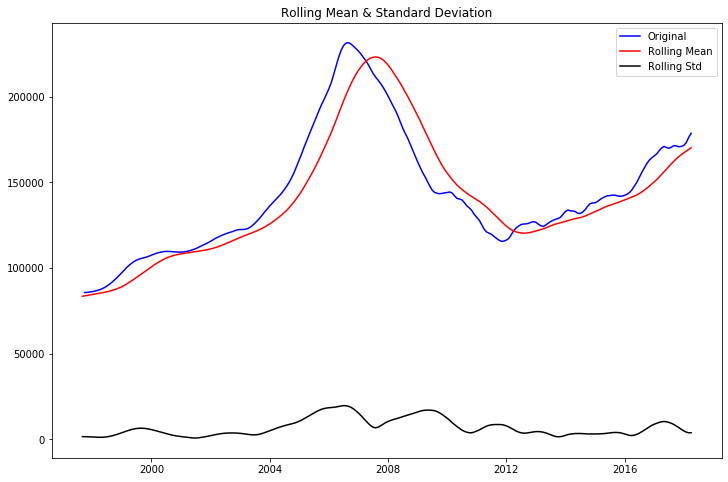

Results of Dickey-Fuller Test:
Test Statistic                  -2.195014
p-value                          0.208060
#Lags Used                       5.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64


In [53]:
output34471 = test_stationarity(df_Ocala['34471'], 18)

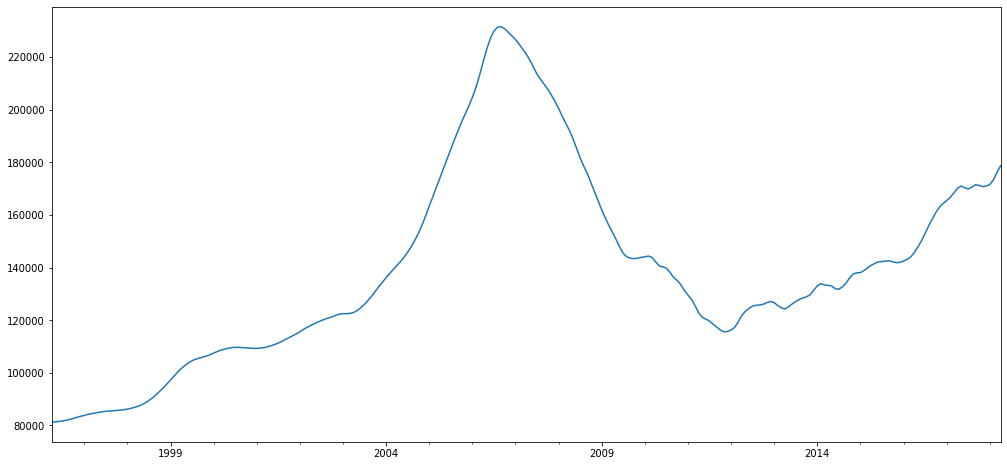

In [54]:
df_Ocala['34471'].plot(figsize=(17,8)) 

#### 34474

In [55]:
data74 = df_Ocala["34474"]
dftest = adfuller(data74)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

if dftest[0] < dftest[4]['5%']:
    print ('Reject Hypothesis - Time series is Stationary')
else:
    print ('Failed to Reject Hypothesis -time series is Non Stationary')

(-2.5881668950461707, 0.09546767566367664, 15, 249, {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}, 3710.147778425054)
Results of Dickey-Fuller Test:
Test Statistic                  -2.588167
p-value                          0.095468
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64
Failed to Reject Hypothesis -time series is Non Stationary


##### Testing Stationary

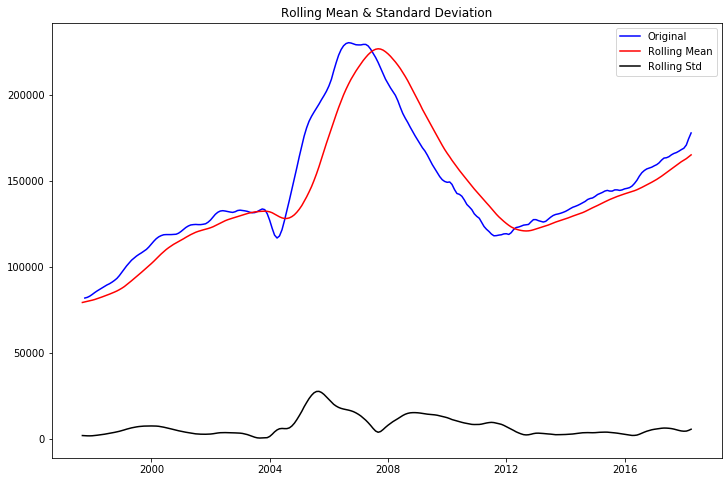

Results of Dickey-Fuller Test:
Test Statistic                  -2.588167
p-value                          0.095468
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [56]:
output34474 = test_stationarity(df_Ocala['34474'], 18)

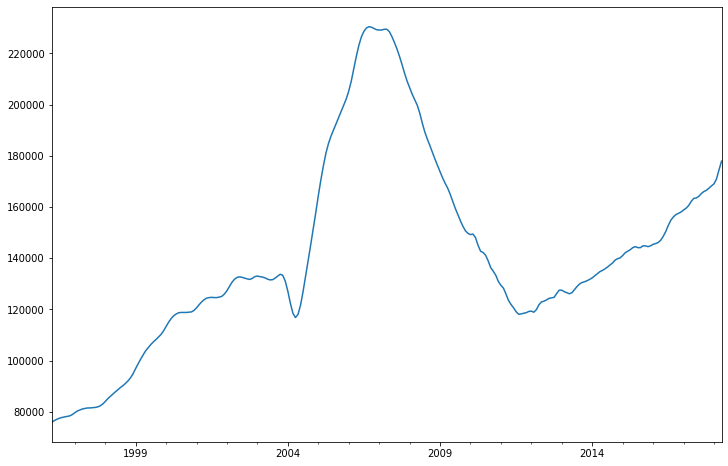

In [57]:
df_Ocala['34474'].plot(figsize=(12, 8)) 

#### 34476

In [58]:
data76 = df_Ocala["34476"]
dftest = adfuller(data76)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

if dftest[0] < dftest[4]['5%']:
    print ('Reject Hypothesis - Time series is Stationary')
else:
    print ('Failed to Reject Hypothesis -time series is Non Stationary')

(-2.4480120824467955, 0.12864115357430445, 5, 259, {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}, 3519.776473627016)
Results of Dickey-Fuller Test:
Test Statistic                  -2.448012
p-value                          0.128641
#Lags Used                       5.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64
Failed to Reject Hypothesis -time series is Non Stationary


##### Testing Stationary

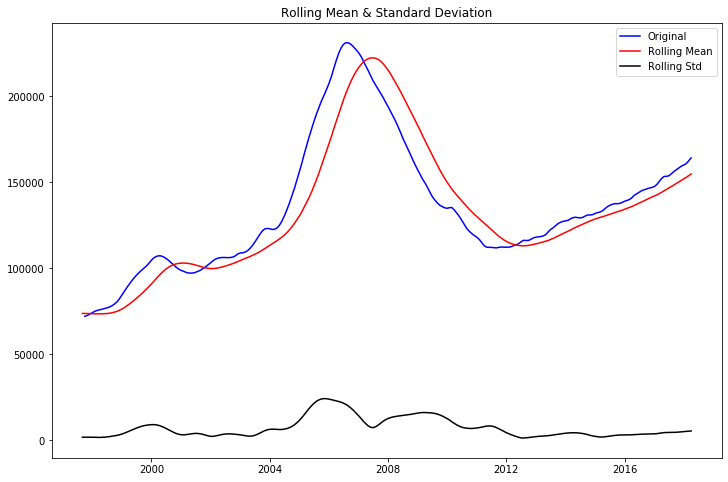

Results of Dickey-Fuller Test:
Test Statistic                  -2.448012
p-value                          0.128641
#Lags Used                       5.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64


In [59]:
output34476 = test_stationarity(df_Ocala['34476'], 18)

#### 34480

In [60]:
data80 = df_Ocala["34480"]
dftest = adfuller(data80)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

if dftest[0] < dftest[4]['5%']:
    print ('Reject Hypothesis - Time series is Stationary')
else:
    print ('Failed to Reject Hypothesis -time series is Non Stationary')

(-2.137100607883889, 0.22986022175781534, 9, 255, {'1%': -3.4562572510874396, '5%': -2.8729420379793598, '10%': -2.5728461399461744}, 3546.402687136926)
Results of Dickey-Fuller Test:
Test Statistic                  -2.137101
p-value                          0.229860
#Lags Used                       9.000000
Number of Observations Used    255.000000
Critical Value (1%)             -3.456257
Critical Value (5%)             -2.872942
Critical Value (10%)            -2.572846
dtype: float64
Failed to Reject Hypothesis -time series is Non Stationary


##### Testing Stationary

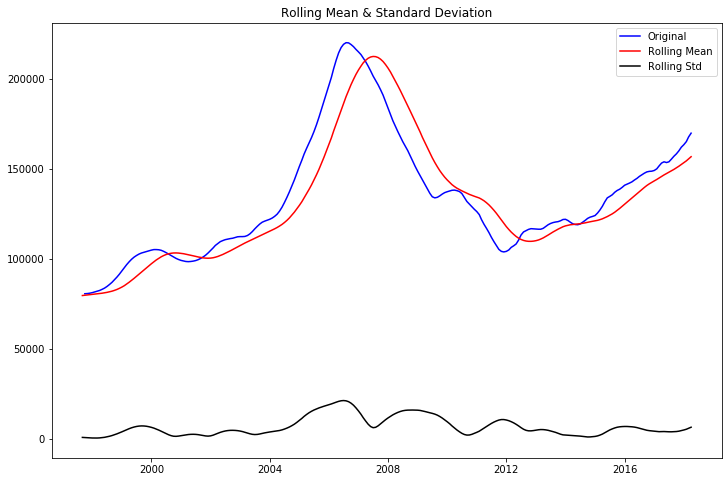

Results of Dickey-Fuller Test:
Test Statistic                  -2.137101
p-value                          0.229860
#Lags Used                       9.000000
Number of Observations Used    255.000000
Critical Value (1%)             -3.456257
Critical Value (5%)             -2.872942
Critical Value (10%)            -2.572846
dtype: float64


In [61]:
output34480 = test_stationarity(df_Ocala['34480'], 18)

#### 34482

In [62]:
data82 = df_Ocala["34482"]
dftest = adfuller(data82)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput) 

if dftest[0] < dftest[4]['5%']:
    print ('Reject Hypothesis - Time series is Stationary')
else:
    print ('Failed to Reject Hypothesis -time series is Non Stationary')

(-2.756721601345477, 0.06472663760577035, 13, 251, {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}, 3568.730830812835)
Results of Dickey-Fuller Test:
Test Statistic                  -2.756722
p-value                          0.064727
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64
Failed to Reject Hypothesis -time series is Non Stationary


##### Testing Stationary

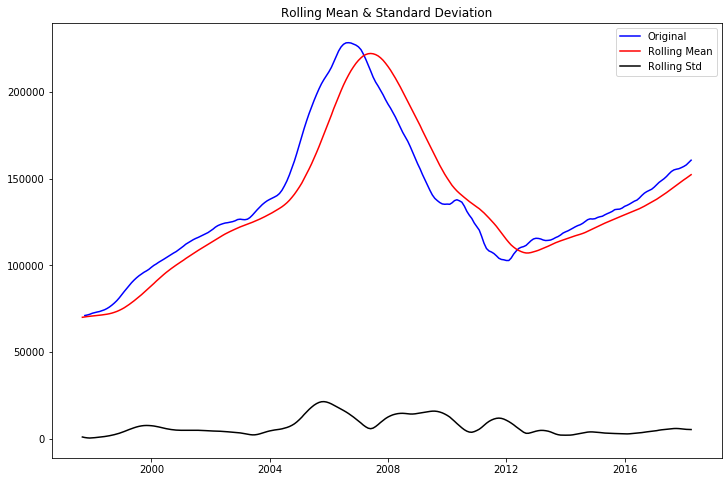

Results of Dickey-Fuller Test:
Test Statistic                  -2.756722
p-value                          0.064727
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


In [63]:
output34482 = test_stationarity(df_Ocala['34482'], 18)

#### Preparing a DataFrame for Results of Dickey-Fuller Test

In [64]:
df_dft =pd.concat([output34471, output34474, output34476,output34480,output34482 ], axis=1)

In [65]:
df_dft

,0,1,2,3,4
Test Statistic,-2.195014,-2.588167,-2.448012,-2.137101,-2.756722
p-value,0.208060,0.095468,0.128641,0.229860,0.064727
#Lags Used,5.000000,15.000000,5.000000,9.000000,13.000000
Number of Observations Used,259.000000,249.000000,259.000000,255.000000,251.000000
Critical Value (1%),-3.455853,-3.456888,-3.455853,-3.456257,-3.456674
Critical Value (5%),-2.872765,-2.873219,-2.872765,-2.872942,-2.873125
Critical Value (10%),-2.572752,-2.572994,-2.572752,-2.572846,-2.572944


- 34474 & 34482 have the lowest p-value , higher lags
- Test statistics less than critical value Reject the null hypothesis 
- Test statistics greater than critical value fail to Reject the null hypothesis 

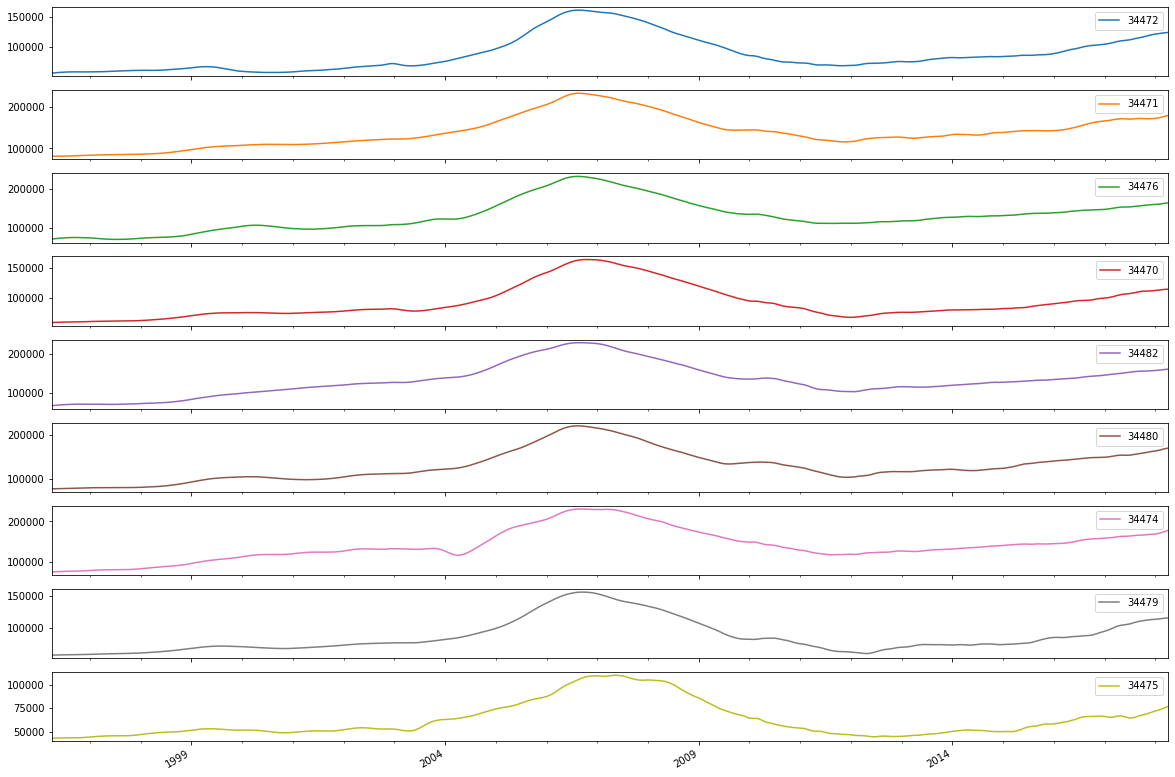

In [66]:
df_Ocala.plot(figsize = (20,15), subplots=True, legend=True)
plt.show()

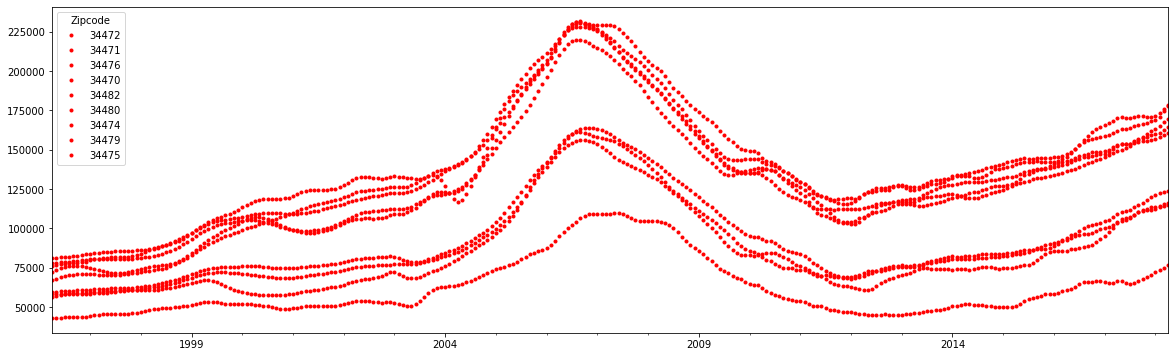

In [67]:
df_Ocala.plot(figsize = (20,6), style = ".r")
plt.show()

In [68]:
df_Ocala.shape

(265, 9)

### Log Transformation

In [69]:
def log_transformation(ts_data_frame):
    for col in ts_data_frame.columns:
        col= pd.Series(np.log(df_Ocala[col]))
        dftest = adfuller(col)
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
            print(dftest)

            print ('Results of Dickey-Fuller Test:')

            print(dfoutput)

In [70]:
log_transformation(df_Ocala)

(-2.5448997474419635, 0.104928313436559, 6, 258, {'1%': -3.455952927706342, '5%': -2.8728086526320302, '10%': -2.572774990685656}, -2103.721925101504)
Results of Dickey-Fuller Test:
Test Statistic                  -2.544900
p-value                          0.104928
#Lags Used                       6.000000
Number of Observations Used    258.000000
Critical Value (1%)             -3.455953
dtype: float64
(-2.5448997474419635, 0.104928313436559, 6, 258, {'1%': -3.455952927706342, '5%': -2.8728086526320302, '10%': -2.572774990685656}, -2103.721925101504)
Results of Dickey-Fuller Test:
Test Statistic                  -2.544900
p-value                          0.104928
#Lags Used                       6.000000
Number of Observations Used    258.000000
Critical Value (1%)             -3.455953
Critical Value (5%)             -2.872809
dtype: float64
(-2.5448997474419635, 0.104928313436559, 6, 258, {'1%': -3.455952927706342, '5%': -2.8728086526320302, '10%': -2.572774990685656}, -2103.7219251

(-2.537040660944121, 0.10672002832988325, 13, 251, {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}, -1843.8344693506006)
Results of Dickey-Fuller Test:
Test Statistic                  -2.537041
p-value                          0.106720
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
dtype: float64
(-2.537040660944121, 0.10672002832988325, 13, 251, {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}, -1843.8344693506006)
Results of Dickey-Fuller Test:
Test Statistic                  -2.537041
p-value                          0.106720
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
dtype: float64
(-2.537040660944121, 0.10672002832988325, 13, 251, {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023},

#### 34471

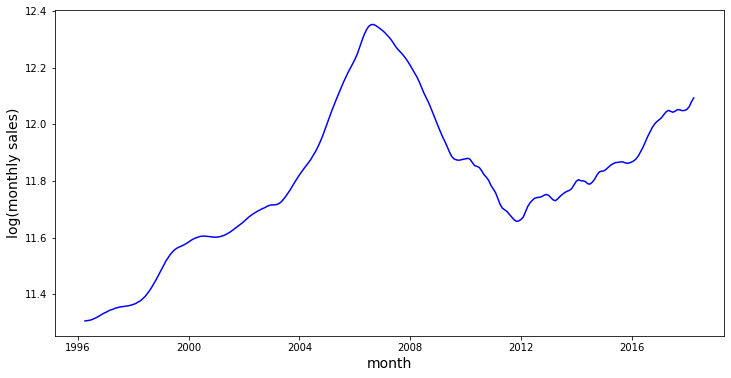

In [71]:
log_71 = pd.Series(np.log(df_Ocala["34471"]))
fig = plt.figure(figsize=(12,6))
plt.plot(log_71, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(monthly sales)", fontsize=14)
plt.show()

In [72]:
data71_log = log_71
dftest = adfuller(data71_log)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

if dftest[0] < dftest[4]['5%']:
    print ('Reject Hypothesis - Time series is Stationary')
else:
    print ('Failed to Reject Hypothesis -time series is Non Stationary')

(-1.9027491513111876, 0.3307689304745169, 7, 257, {'1%': -3.4560535712549925, '5%': -2.8728527662442334, '10%': -2.5727985212493754}, -2269.2292363749852)
Results of Dickey-Fuller Test:
Test Statistic                  -1.902749
p-value                          0.330769
#Lags Used                       7.000000
Number of Observations Used    257.000000
Critical Value (1%)             -3.456054
Critical Value (5%)             -2.872853
Critical Value (10%)            -2.572799
dtype: float64
Failed to Reject Hypothesis -time series is Non Stationary


##### Testing Stationary post log_tran

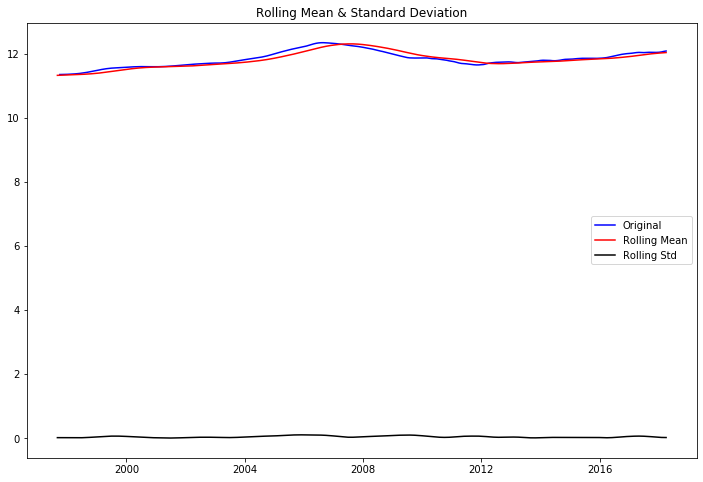

Results of Dickey-Fuller Test:
Test Statistic                  -1.902749
p-value                          0.330769
#Lags Used                       7.000000
Number of Observations Used    257.000000
Critical Value (1%)             -3.456054
Critical Value (5%)             -2.872853
Critical Value (10%)            -2.572799
dtype: float64


In [73]:
log_output34471 = test_stationarity(data71_log, 18)

#### 34474

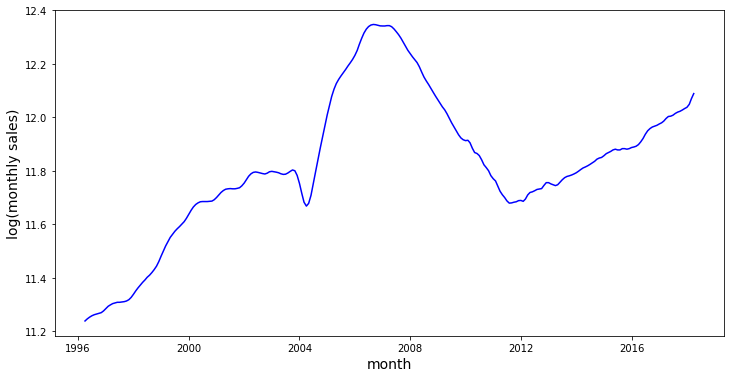

In [74]:
log_74 = pd.Series(np.log(df_Ocala["34474"]))
fig = plt.figure(figsize=(12,6))
plt.plot(log_74, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(monthly sales)", fontsize=14)
plt.show()

In [75]:
data74_log = log_74
dftest = adfuller(data74_log)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

if dftest[0] < dftest[4]['5%']:
    print ('Reject Hypothesis - Time series is Stationary')
else:
    print ('Failed to Reject Hypothesis -time series is Non Stationary')

(-2.6053466960864506, 0.09189724166866842, 15, 249, {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}, -2162.663973915521)
Results of Dickey-Fuller Test:
Test Statistic                  -2.605347
p-value                          0.091897
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64
Failed to Reject Hypothesis -time series is Non Stationary


##### Testing Stationary post log_tran

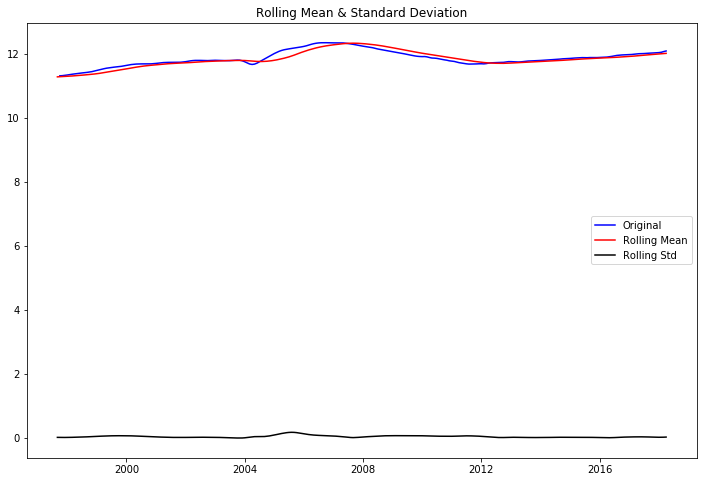

Results of Dickey-Fuller Test:
Test Statistic                  -2.605347
p-value                          0.091897
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [76]:
log_output34474 = test_stationarity(data74_log, 18)

#### 34476

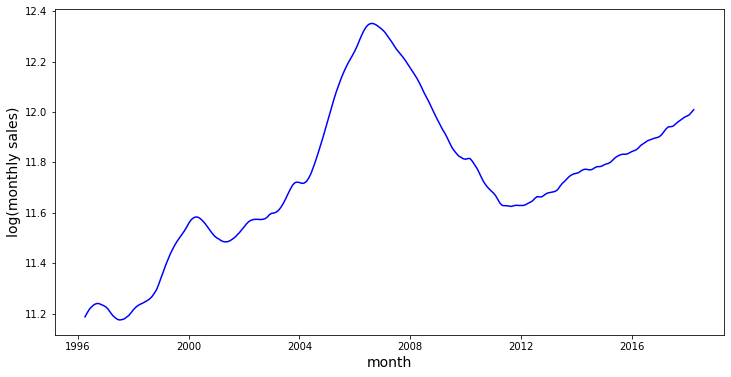

In [77]:
log_76 = pd.Series(np.log(df_Ocala["34476"]))
fig = plt.figure(figsize=(12,6))
plt.plot(log_76, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(monthly sales)", fontsize=14)
plt.show()

In [78]:
data76_log = log_76
dftest = adfuller(data76_log)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

if dftest[0] < dftest[4]['5%']:
    print ('Reject Hypothesis - Time series is Stationary')
else:
    print ('Failed to Reject Hypothesis -time series is Non Stationary')

(-2.1144247322545517, 0.23875404204735823, 5, 259, {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}, -2313.413773932448)
Results of Dickey-Fuller Test:
Test Statistic                  -2.114425
p-value                          0.238754
#Lags Used                       5.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64
Failed to Reject Hypothesis -time series is Non Stationary


##### Testing Stationary post log_tran

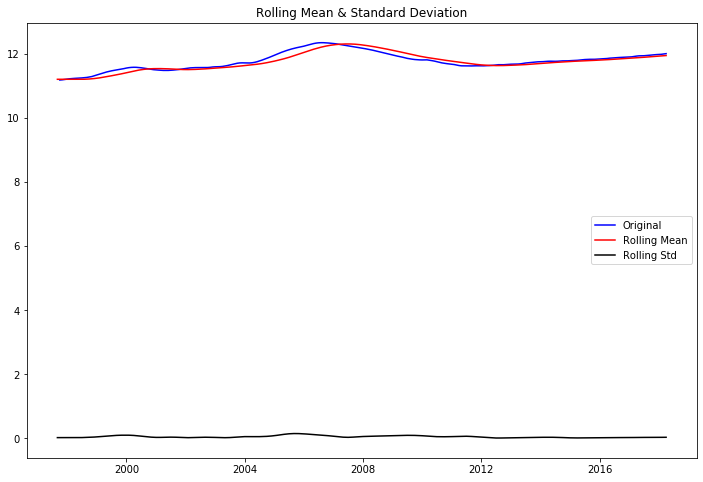

Results of Dickey-Fuller Test:
Test Statistic                  -2.114425
p-value                          0.238754
#Lags Used                       5.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64


In [79]:
log_output34476 = test_stationarity(data76_log, 18)

#### 34480

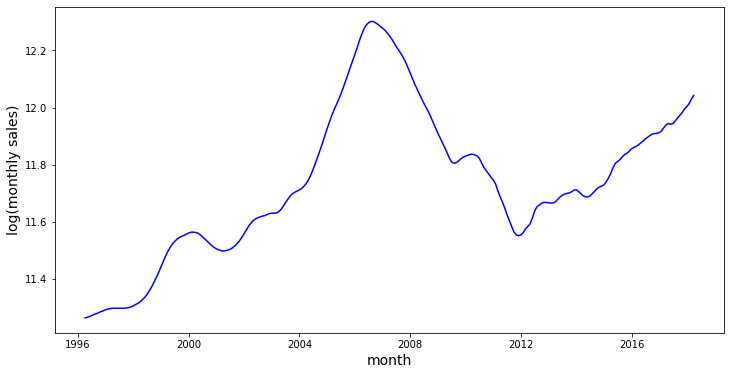

In [80]:
log_80 = pd.Series(np.log(df_Ocala["34480"]))
fig = plt.figure(figsize=(12,6))
plt.plot(log_80, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(monthly sales)", fontsize=14)
plt.show()

In [81]:
data80_log = log_80
dftest = adfuller(data80_log)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

if dftest[0] < dftest[4]['5%']:
    print ('Reject Hypothesis - Time series is Stationary')
else:
    print ('Failed to Reject Hypothesis -time series is Non Stationary')

(-2.1428802421364446, 0.22762528837471735, 11, 253, {'1%': -3.4564641849494113, '5%': -2.873032730098417, '10%': -2.572894516864816}, -2305.32520172226)
Results of Dickey-Fuller Test:
Test Statistic                  -2.142880
p-value                          0.227625
#Lags Used                      11.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64
Failed to Reject Hypothesis -time series is Non Stationary


##### Testing Stationary post log_tran

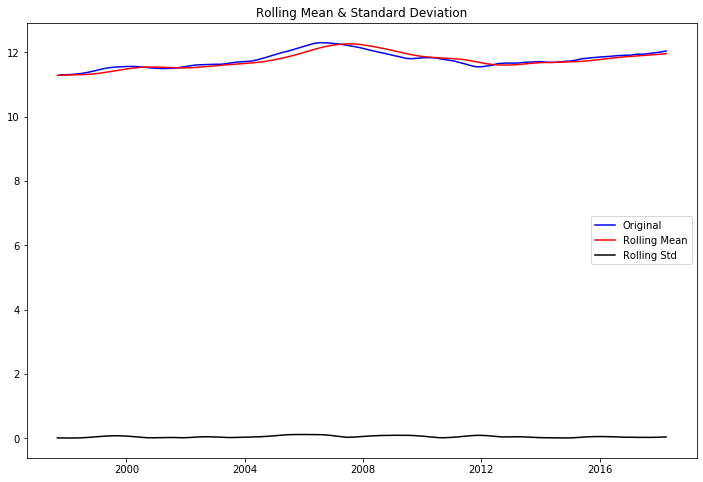

Results of Dickey-Fuller Test:
Test Statistic                  -2.142880
p-value                          0.227625
#Lags Used                      11.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


In [82]:
log_output34480 = test_stationarity(data80_log, 18)

#### 34482

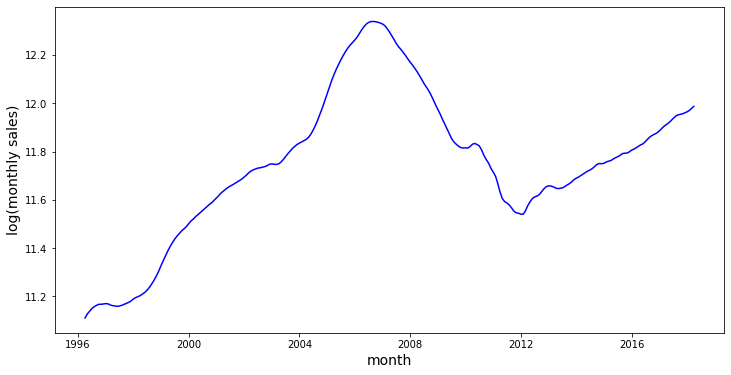

In [83]:
log_82 = pd.Series(np.log(df_Ocala["34482"]))
fig = plt.figure(figsize=(12,6))
plt.plot(log_82, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(monthly sales)", fontsize=14)
plt.show()

In [84]:
data82_log = log_82
dftest = adfuller(data82_log)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller Test:')

print(dfoutput)

if dftest[0] < dftest[4]['5%']:
    print ('Reject Hypothesis - Time series is Stationary')
else:
    print ('Failed to Reject Hypothesis -time series is Non Stationary')

(-2.6489843066326344, 0.08328980528085733, 13, 251, {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}, -2263.6824399458774)
Results of Dickey-Fuller Test:
Test Statistic                  -2.648984
p-value                          0.083290
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64
Failed to Reject Hypothesis -time series is Non Stationary


##### Testing Stationary post log_tran

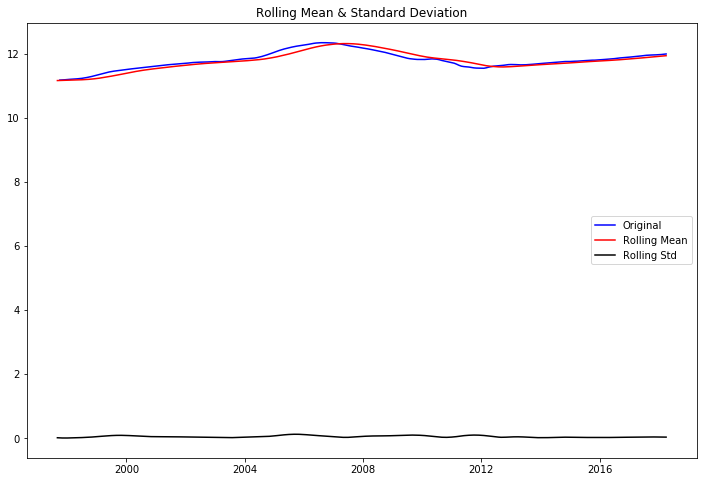

Results of Dickey-Fuller Test:
Test Statistic                  -2.648984
p-value                          0.083290
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


In [85]:
log_output34482 = test_stationarity(data82_log, 18)

#### Preparing a DataFrame for Results of Dickey-Fuller Test post log transformation

In [86]:
df_dft_log =pd.concat([log_output34471,log_output34474, log_output34476, log_output34480,log_output34482], axis=1)

In [87]:
df_dft_log

,0,1,2,3,4
Test Statistic,-1.902749,-2.605347,-2.114425,-2.142880,-2.648984
p-value,0.330769,0.091897,0.238754,0.227625,0.083290
#Lags Used,7.000000,15.000000,5.000000,11.000000,13.000000
Number of Observations Used,257.000000,249.000000,259.000000,253.000000,251.000000
Critical Value (1%),-3.456054,-3.456888,-3.455853,-3.456464,-3.456674
Critical Value (5%),-2.872853,-2.873219,-2.872765,-2.873033,-2.873125
Critical Value (10%),-2.572799,-2.572994,-2.572752,-2.572895,-2.572944


In [88]:
df_dft

,0,1,2,3,4
Test Statistic,-2.195014,-2.588167,-2.448012,-2.137101,-2.756722
p-value,0.208060,0.095468,0.128641,0.229860,0.064727
#Lags Used,5.000000,15.000000,5.000000,9.000000,13.000000
Number of Observations Used,259.000000,249.000000,259.000000,255.000000,251.000000
Critical Value (1%),-3.455853,-3.456888,-3.455853,-3.456257,-3.456674
Critical Value (5%),-2.872765,-2.873219,-2.872765,-2.872942,-2.873125
Critical Value (10%),-2.572752,-2.572994,-2.572752,-2.572846,-2.572944


#### Differencing

No handles with labels found to put in legend.


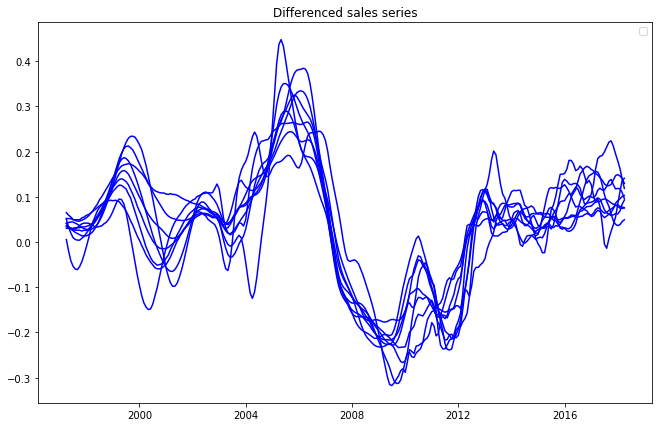

In [89]:
## rolling average set to 12 months
df_Ocala_log=np.log(df_Ocala) #log transformation first
Ocala_diff = df_Ocala_log.diff(periods=12) #need to check/verify what this is doing

fig = plt.figure(figsize=(11,7))
plt.plot(Ocala_diff, color='blue')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

In [90]:
#missing the first rows at the beginning
Ocala_diff= Ocala_diff[12:]
Ocala_diff.head(10) 

Zipcode,34472,34471,34476,34470,34482,34480,34474,34479,34475
1997-04-01,0.041673,0.040970,0.005525,0.036368,0.050994,0.034073,0.064950,0.030511,0.052107
1997-05-01,0.034427,0.043276,-0.019258,0.032952,0.033264,0.031509,0.059549,0.030408,0.051872
1997-06-01,0.029037,0.044398,-0.041102,0.031227,0.020145,0.028951,0.055500,0.030356,0.051755
1997-07-01,0.027166,0.044292,-0.053255,0.027848,0.010007,0.025127,0.050325,0.030305,0.049448
1997-08-01,0.028694,0.041797,-0.059800,0.026188,0.005690,0.021317,0.047688,0.031909,0.049448
1997-09-01,0.031962,0.039314,-0.060953,0.026145,0.004246,0.018786,0.046345,0.031855,0.049448
1997-10-01,0.036917,0.035633,-0.053994,0.026103,0.004228,0.016240,0.046229,0.031802,0.049337
1997-11-01,0.040274,0.031974,-0.043133,0.024411,0.008439,0.013707,0.048547,0.033392,0.053584
1997-12-01,0.041917,0.029501,-0.028209,0.025975,0.012614,0.013673,0.050659,0.033281,0.055385
1998-01-01,0.041847,0.028237,-0.010710,0.025850,0.019526,0.013623,0.053803,0.034801,0.059163


No handles with labels found to put in legend.


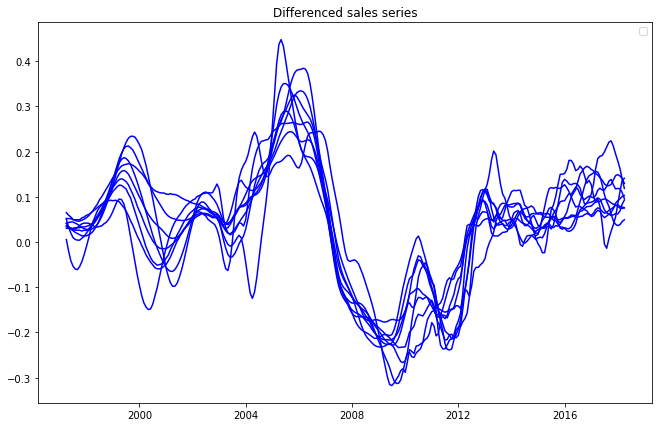

Zipcode,34472,34471,34476,34470,34482,34480,34474,34479,34475
1997-04-01,0.041673,0.040970,0.005525,0.036368,0.050994,0.034073,0.064950,0.030511,0.052107
1997-05-01,0.034427,0.043276,-0.019258,0.032952,0.033264,0.031509,0.059549,0.030408,0.051872
1997-06-01,0.029037,0.044398,-0.041102,0.031227,0.020145,0.028951,0.055500,0.030356,0.051755
1997-07-01,0.027166,0.044292,-0.053255,0.027848,0.010007,0.025127,0.050325,0.030305,0.049448
1997-08-01,0.028694,0.041797,-0.059800,0.026188,0.005690,0.021317,0.047688,0.031909,0.049448
1997-09-01,0.031962,0.039314,-0.060953,0.026145,0.004246,0.018786,0.046345,0.031855,0.049448
1997-10-01,0.036917,0.035633,-0.053994,0.026103,0.004228,0.016240,0.046229,0.031802,0.049337
1997-11-01,0.040274,0.031974,-0.043133,0.024411,0.008439,0.013707,0.048547,0.033392,0.053584
1997-12-01,0.041917,0.029501,-0.028209,0.025975,0.012614,0.013673,0.050659,0.033281,0.055385
1998-01-01,0.041847,0.028237,-0.010710,0.025850,0.019526,0.013623,0.053803,0.034801,0.059163


In [91]:
## rolling average set to 12 months
df_Ocala_log=np.log(df_Ocala) #log transformation first
Ocala_diff = df_Ocala_log.diff(periods=12) #need to check/verify what this is doing

fig = plt.figure(figsize=(11,7))
plt.plot(Ocala_diff, color='blue')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

#missing the first rows at the beginning
Ocala_diff= Ocala_diff[12:]
Ocala_diff.head(10) 

#### Test_Dickey_Fuller

In [92]:
def test_dickey_fuller(ts_data_frame):
    for col in df_Ocala.columns:
        dftest = adfuller(ts_data_frame[col])
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#         for key,value in dftest[4].items():
#             dfoutput['Critical Value (%s)'%key] = value
        print(dftest)

        print ('Results of Dickey-Fuller Test:')

        print(dfoutput) 

In [93]:
#performs a rolling mean
rolmean = Ocala_diff.rolling(window = 4).mean()
rolmean=rolmean[3:]
rolmean.head()
test_dickey_fuller(rolmean) 

(-2.80950612127962, 0.056928664015055246, 16, 233, {'1%': -3.458731141928624, '5%': -2.8740258764297293, '10%': -2.5734243167124093}, -2448.223387530372)
Results of Dickey-Fuller Test:
Test Statistic                  -2.809506
p-value                          0.056929
#Lags Used                      16.000000
Number of Observations Used    233.000000
dtype: float64
(-2.598371247225494, 0.09333436499557779, 15, 234, {'1%': -3.4586084859607156, '5%': -2.873972159235721, '10%': -2.57339565928848}, -2621.5267670015605)
Results of Dickey-Fuller Test:
Test Statistic                  -2.598371
p-value                          0.093334
#Lags Used                      15.000000
Number of Observations Used    234.000000
dtype: float64
(-2.5901091719369647, 0.0950587801717433, 15, 234, {'1%': -3.4586084859607156, '5%': -2.873972159235721, '10%': -2.57339565928848}, -2658.992135048303)
Results of Dickey-Fuller Test:
Test Statistic                  -2.590109
p-value                          0.09505

In [94]:
df_Ocala.columns

Index(['34472', '34471', '34476', '34470', '34482', '34480', '34474', '34479', '34475'], dtype='object', name='Zipcode')

In [95]:
test_dickey_fuller(df_Ocala)

(-3.1041140290937994, 0.026250226195299056, 6, 258, {'1%': -3.455952927706342, '5%': -2.8728086526320302, '10%': -2.572774990685656}, 3531.1765419032654)
Results of Dickey-Fuller Test:
Test Statistic                  -3.104114
p-value                          0.026250
#Lags Used                       6.000000
Number of Observations Used    258.000000
dtype: float64
(-2.1950138094249128, 0.20806013130126033, 5, 259, {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}, 3621.1883399817707)
Results of Dickey-Fuller Test:
Test Statistic                  -2.195014
p-value                          0.208060
#Lags Used                       5.000000
Number of Observations Used    259.000000
dtype: float64
(-2.4480120824467955, 0.12864115357430445, 5, 259, {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}, 3519.776473627016)
Results of Dickey-Fuller Test:
Test Statistic                  -2.448012
p-value                          0.12864

In [96]:
rolmean.dropna(inplace=True)
rolmean.tail(5)

Zipcode,34472,34471,34476,34470,34482,34480,34474,34479,34475
2017-12-01,0.134191,0.056736,0.075281,0.129459,0.085857,0.071644,0.060791,0.213033,0.031343
2018-01-01,0.140276,0.046078,0.078217,0.125419,0.082958,0.079105,0.060981,0.202592,0.050456
2018-02-01,0.144954,0.040282,0.079635,0.120228,0.080027,0.086770,0.063552,0.187019,0.072653
2018-03-01,0.145756,0.039916,0.079797,0.116014,0.077680,0.093524,0.069369,0.169107,0.096945
2018-04-01,0.141481,0.042406,0.078523,0.110626,0.075926,0.097827,0.076982,0.150020,0.118372


### Seasonal Decompose

In [97]:
rolmean.index

DatetimeIndex(['1997-07-01', '1997-08-01', '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01', '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01'], dtype='datetime64[ns]', length=250, freq=None)

#### 34471

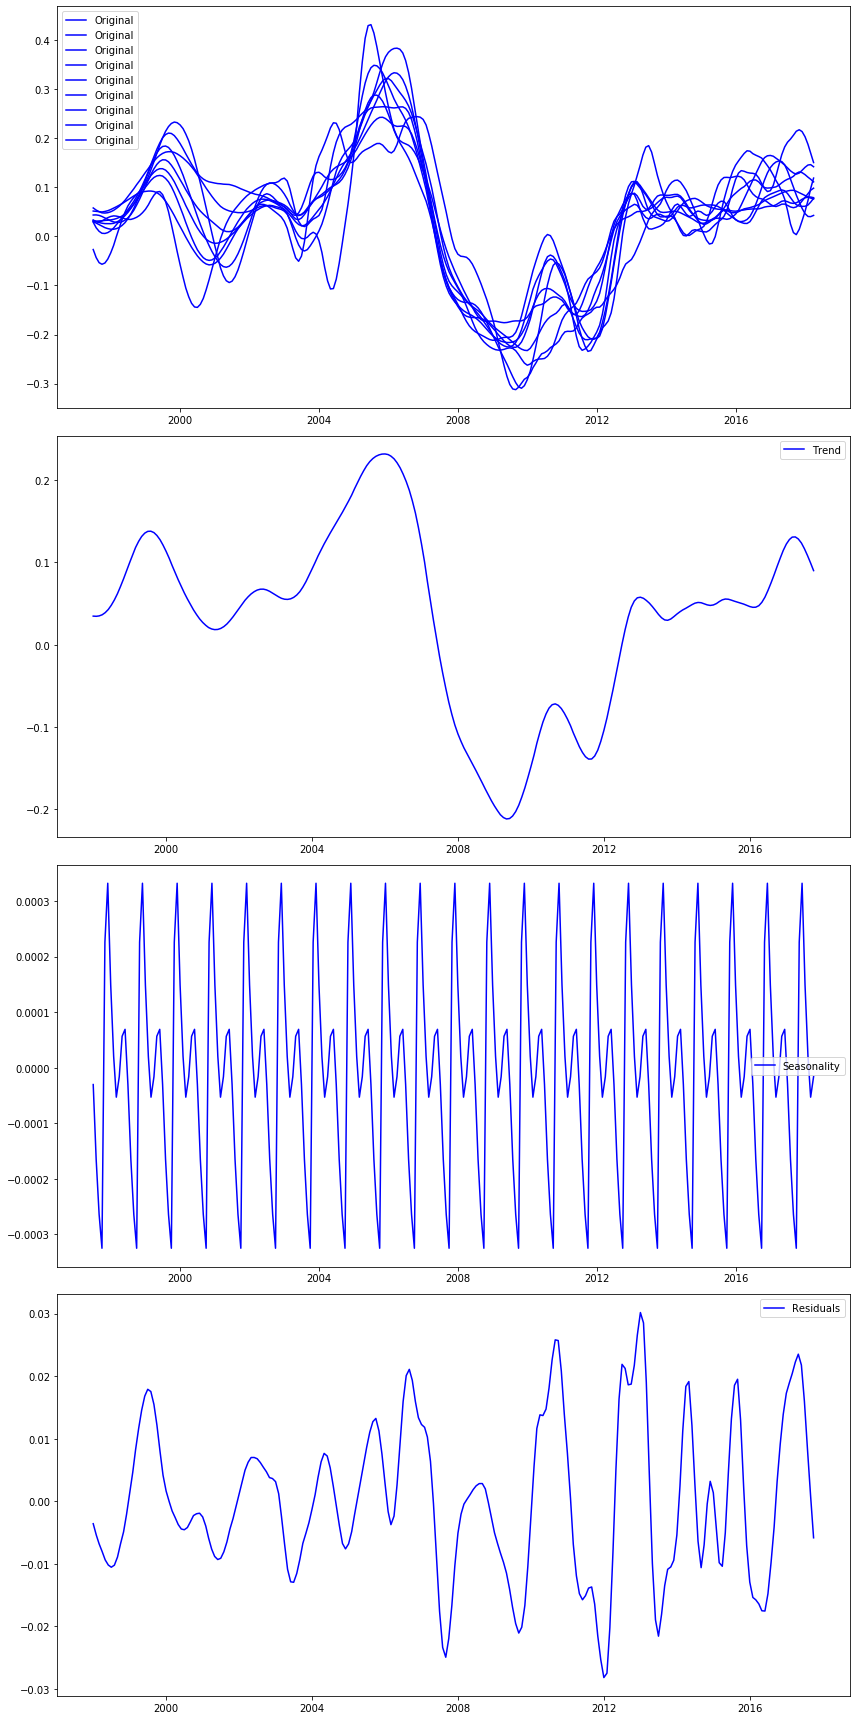

In [98]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(rolmean['34471'])

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,24))
plt.subplot(411)
plt.plot(rolmean, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

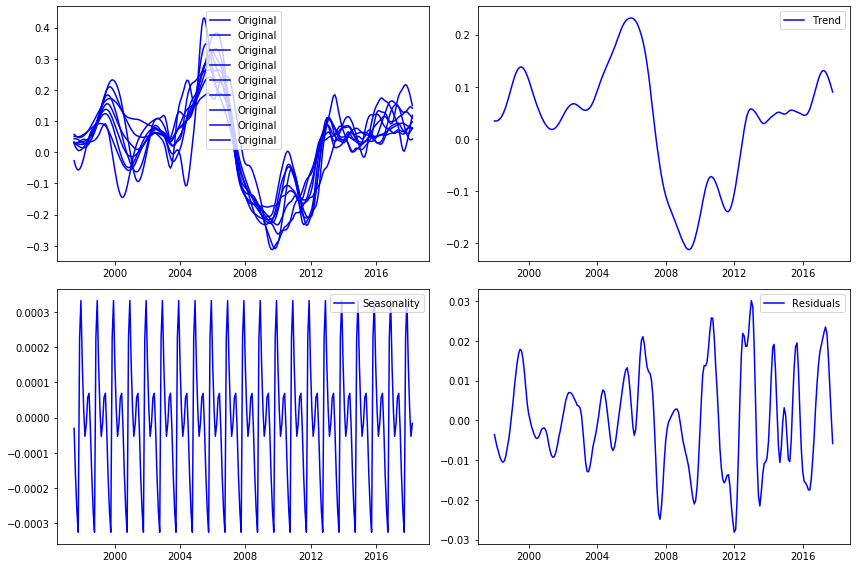

In [99]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(rolmean['34471'])

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.plot(rolmean, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(223)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

#### 34474

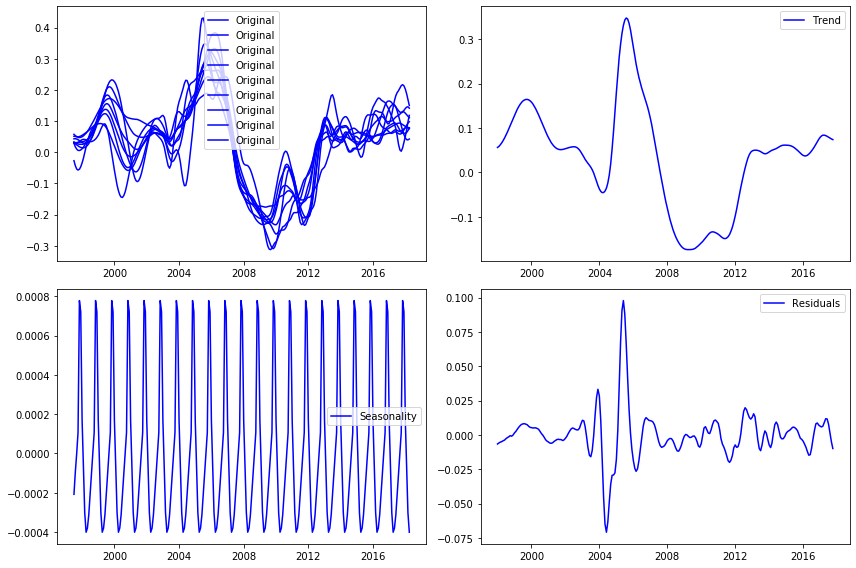

In [100]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(rolmean['34474'])

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.plot(rolmean, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(223)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

#### 34476

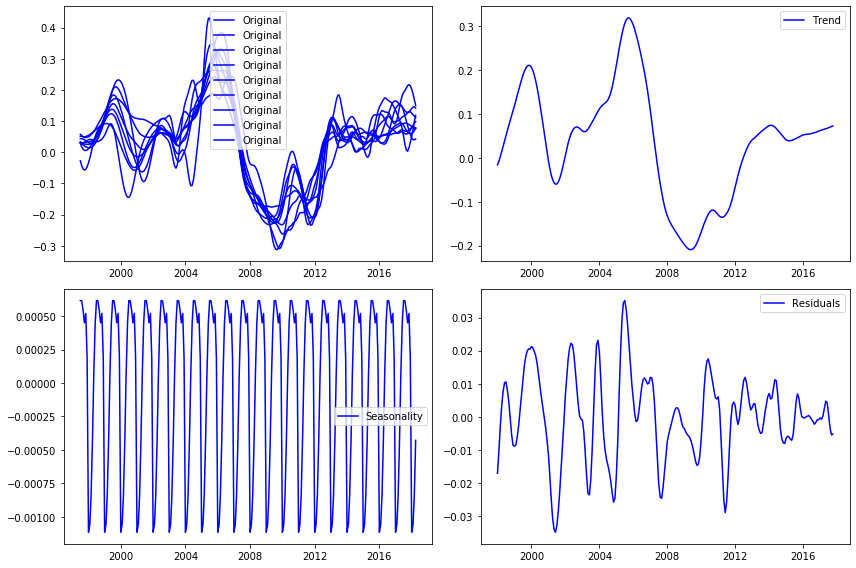

In [101]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(rolmean['34476'])

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.plot(rolmean, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(223)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

#### 34480

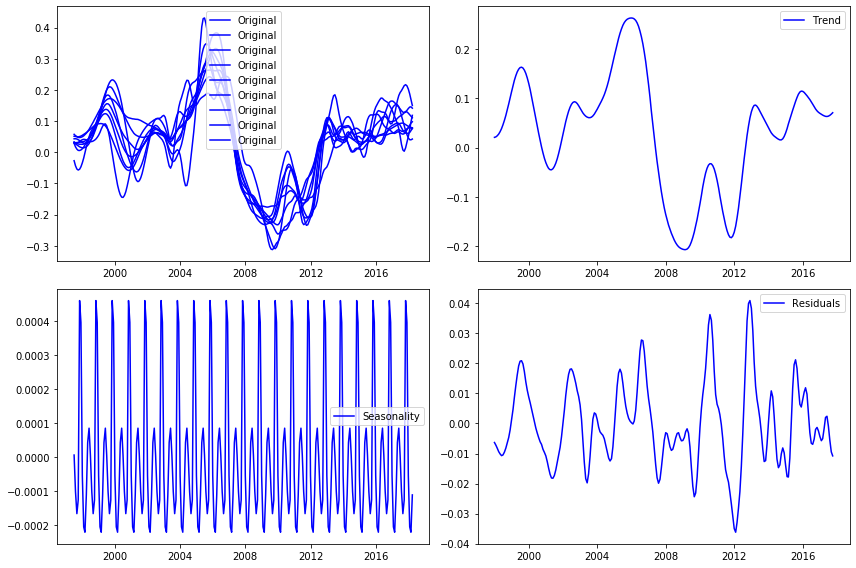

In [102]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(rolmean['34480'])

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.plot(rolmean, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(223)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

#### 34482

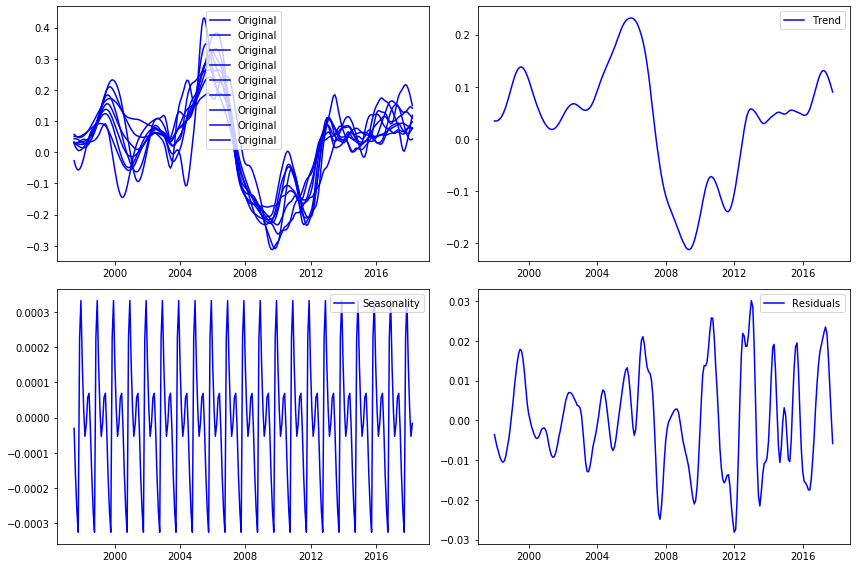

In [103]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(rolmean['34471'])

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.plot(rolmean, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(223)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

#### Dropping NAN

In [104]:
df_Ocala_dc=decomposition.resid.dropna()
df_Ocala_dc.tail()

2017-06-01    0.021767
2017-07-01    0.016003
2017-08-01    0.008297
2017-09-01    0.000897
2017-10-01   -0.005832
Name: resid, dtype: float64

### Auto Correlation

In [105]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders

In [106]:
Ocala_diff.head(15) 

Zipcode,34472,34471,34476,34470,34482,34480,34474,34479,34475
1997-04-01,0.041673,0.040970,0.005525,0.036368,0.050994,0.034073,0.064950,0.030511,0.052107
1997-05-01,0.034427,0.043276,-0.019258,0.032952,0.033264,0.031509,0.059549,0.030408,0.051872
1997-06-01,0.029037,0.044398,-0.041102,0.031227,0.020145,0.028951,0.055500,0.030356,0.051755
1997-07-01,0.027166,0.044292,-0.053255,0.027848,0.010007,0.025127,0.050325,0.030305,0.049448
1997-08-01,0.028694,0.041797,-0.059800,0.026188,0.005690,0.021317,0.047688,0.031909,0.049448
1997-09-01,0.031962,0.039314,-0.060953,0.026145,0.004246,0.018786,0.046345,0.031855,0.049448
1997-10-01,0.036917,0.035633,-0.053994,0.026103,0.004228,0.016240,0.046229,0.031802,0.049337
1997-11-01,0.040274,0.031974,-0.043133,0.024411,0.008439,0.013707,0.048547,0.033392,0.053584
1997-12-01,0.041917,0.029501,-0.028209,0.025975,0.012614,0.013673,0.050659,0.033281,0.055385
1998-01-01,0.041847,0.028237,-0.010710,0.025850,0.019526,0.013623,0.053803,0.034801,0.059163


#### 34471 

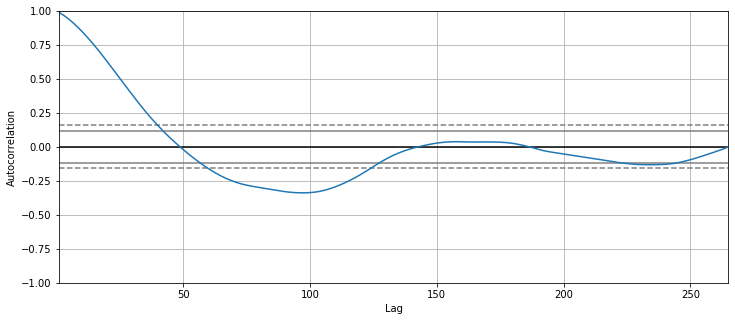

In [107]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(log_71);

##### Auto Correlation at 40 lags 
- The red line meets the dotted line at around 40 lags

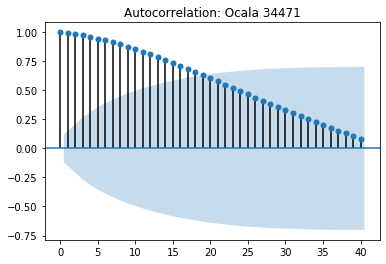

In [108]:
title = 'Autocorrelation: Ocala 34471'
lags = 40
plot_acf(df_Ocala['34471'],title=title,lags=lags);

#### 34474

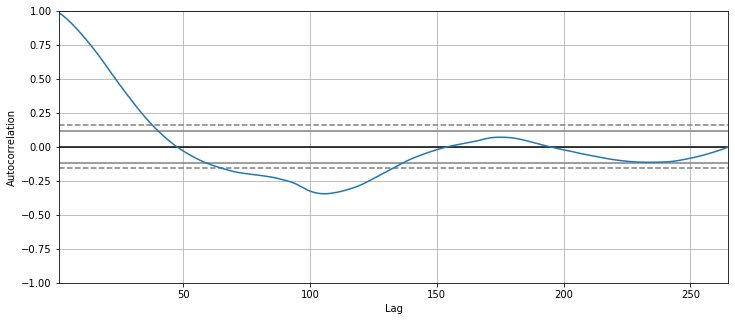

In [109]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(log_74);

##### Auto Correlation at 40 lags 
- The red line meets the dotted line at around 40 lags

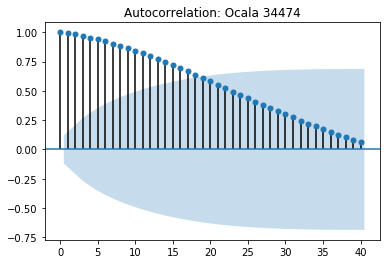

In [110]:
title = 'Autocorrelation: Ocala 34474'
lags = 40
plot_acf(df_Ocala['34474'],title=title,lags=lags);

#### 34476 

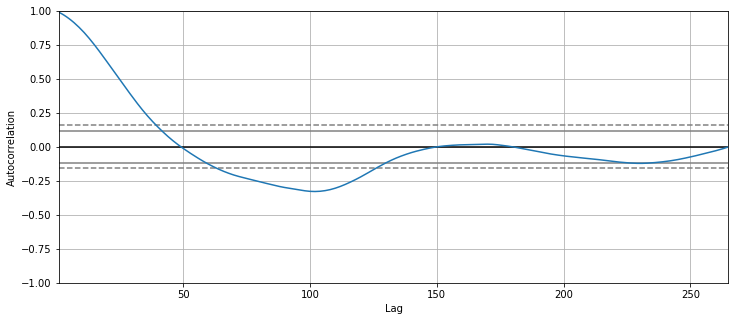

In [111]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(log_76);

##### Auto Correlation at 40 lags 
- The red line meets the dotted line at around 40 lags

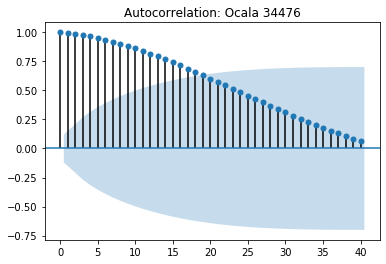

In [112]:
title = 'Autocorrelation: Ocala 34476'
lags = 40
plot_acf(df_Ocala['34476'],title=title,lags=lags);

#### 34480

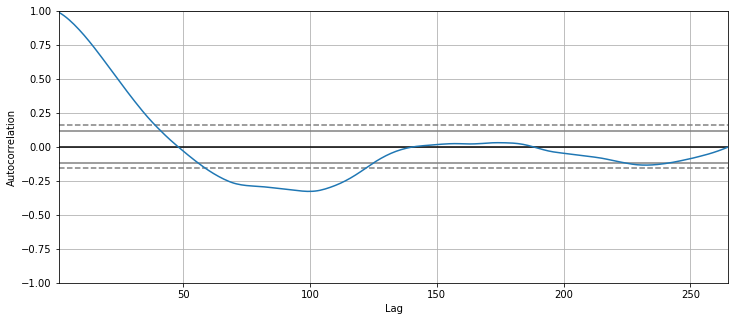

In [113]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(log_80);

##### Auto Correlation at 40 lags 
- The red line meets the dotted line at around 40 lags

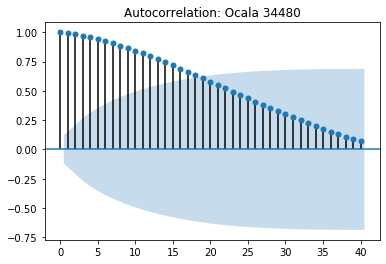

In [114]:
title = 'Autocorrelation: Ocala 34480'
lags = 40
plot_acf(df_Ocala['34480'],title=title,lags=lags);

#### 34482

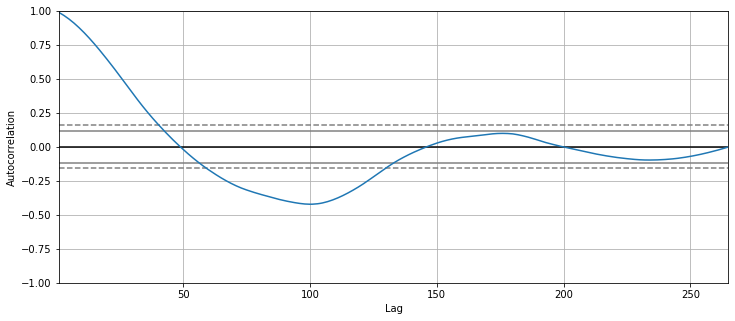

In [115]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(log_82);

##### Auto Correlation at 40 lags 
- The red line meets the dotted line at around 40 lags

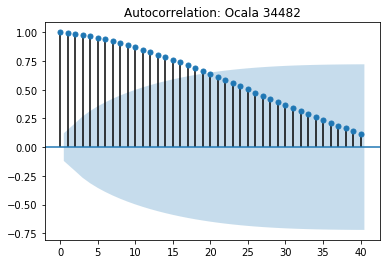

In [116]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
title = 'Autocorrelation: Ocala 34482'
lags = 40
plot_acf(df_Ocala['34482'],title=title,lags=lags);

### Partial Auto Correlation

#### 34471

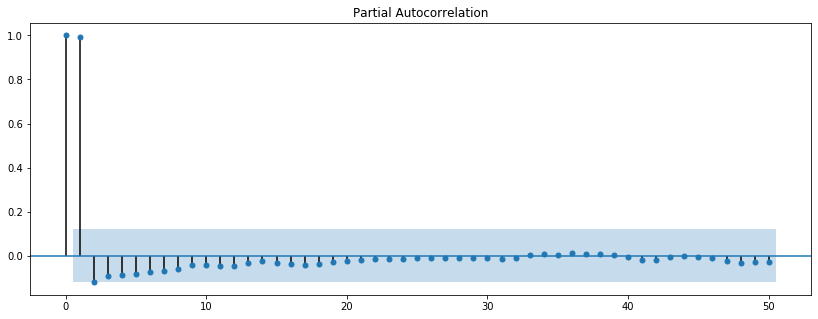

In [117]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(log_71, lags = 50);

We can see that there are two statistically significant correlation spikes out of 50 lags

#### 34474

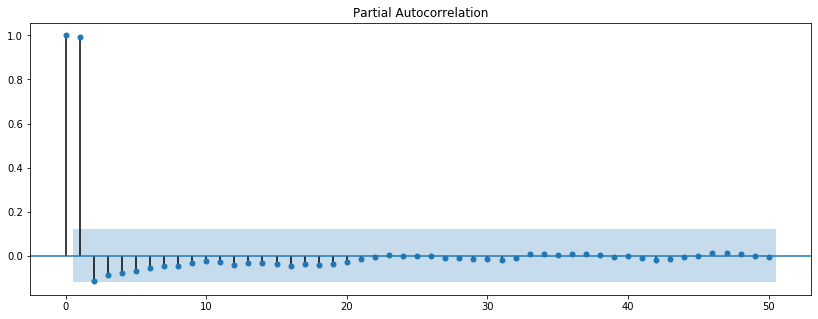

In [118]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(log_74, lags = 50);

#### 34476

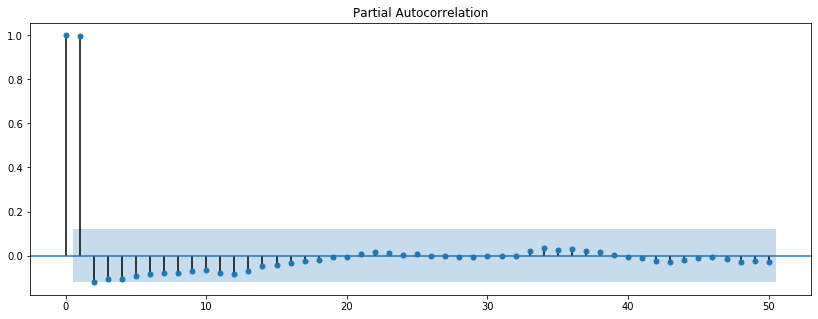

In [119]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(log_76, lags = 50);

#### 34480

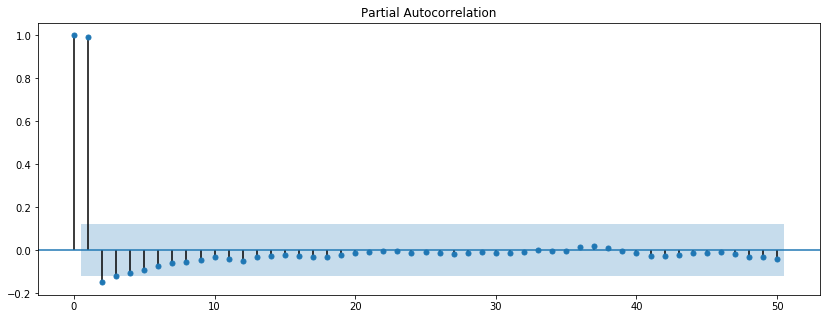

In [120]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(log_80, lags = 50);

#### 34482

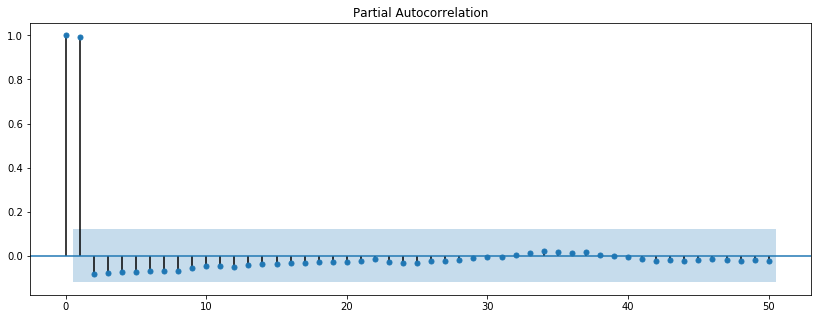

In [121]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(log_82, lags = 50);

### Grid Search

In [122]:
# ! pip install pmdarima

In [123]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

#### Auto Arima 71

In [124]:
#build model for 34471 zip code
stepwise_fit_34471 = auto_arima(df_Ocala['34471'], start_p=0, start_q=0, max_p=4, max_q=4, seasonal=True, trace = False, m = 12)

In [125]:
stepwise_fit_34471.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  265
Model:             SARIMAX(4, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -2280.110
Date:                            Thu, 04 Mar 2021   AIC                           4572.219
Time:                                    20:51:14   BIC                           4593.675
Sample:                                         0   HQIC                          4580.841
                                            - 265                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1141      0.004     27.334      0.000       0.106       0.122
ar.L2          0.0931      0.005     18.067      0.000       0.083       0.103
ar.L3          0.0857      0.007     12.748      0.000       0.073       0.099
ar.L4          0.0886      0.007     12.229      0.000       0.074       0.103
ar.S.L12       0.0475      0.014      3.351      0.001       0.020       0.075
sigma2       1.42e+06   2.69e-10   5.27e+15      0.000    1.42e+06    1.42e+06
===================================================================================
Ljung-Box (L1) (Q):                 193.04   Jarque-Bera (JB):               222.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                            -1.05
Prob(H) (two-sided):                  0.05   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.34e+32. Standard errors may be unstable.
"""

In [126]:
stepwise_fit = auto_arima(df_Ocala['34471'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=12,
                          seasonal=True,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4672.474, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4676.518, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4624.415, Time=1.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4686.858, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4628.809, Time=0.22 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4627.510, Time=2.43 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4645.633, Time=3.44 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4670.519, Time=0.09 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=4601.308, Time=0.68 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=4604.474, Time=0.29 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=4603.217, Time=2.39 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  265
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2269.104
Date:                Thu, 04 Mar 2021   AIC                           4544.207
Time:                        20:51:43   BIC                           4554.935
Sample:                             0   HQIC                          4548.518
                                - 265                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8955      0.014     64.287      0.000       0.868       0.923
ma.L1         -0.7948      0.018    -43.894      0.000      -0.830      -0.759
sigma2      1.339e+06   1.14e-09   1.17e+15      0.000    1.34e+06    1.34e+06
===================================================================================
Ljung-Box (L1) (Q):                 207.99   Jarque-Bera (JB):                90.07
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.76
Prob(H) (two-sided):                  0.31   Kurtosis:                         5.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.95e+30. Standard errors may be unstable.
"""

#### Auto Arima 74

In [127]:
#build model for 34474 zip code
stepwise_fit_34474 = auto_arima(df_Ocala['34474'], start_p=0, start_q=0, max_p=4, max_q=4, seasonal=True, trace = False, m = 12)

In [128]:
stepwise_fit_34474.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  265
Model:             SARIMAX(4, 1, 0)x(0, 0, [1], 12)   Log Likelihood               -2314.116
Date:                              Thu, 04 Mar 2021   AIC                           4640.233
Time:                                      20:52:30   BIC                           4661.688
Sample:                                           0   HQIC                          4648.854
                                              - 265                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1460      0.005     31.149      0.000       0.137       0.155
ar.L2          0.1016      0.007     15.274      0.000       0.089       0.115
ar.L3          0.0768      0.010      8.012      0.000       0.058       0.096
ar.L4          0.0647      0.012      5.506      0.000       0.042       0.088
ma.S.L12       0.0510      0.017      2.958      0.003       0.017       0.085
sigma2      1.986e+06    6.5e-11   3.05e+16      0.000    1.99e+06    1.99e+06
===================================================================================
Ljung-Box (L1) (Q):                 184.84   Jarque-Bera (JB):               370.01
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.11e+32. Standard errors may be unstable.
"""

#### Auto Arima 76

In [129]:
#build model for 34476 zip code
stepwise_fit_34476 = auto_arima(df_Ocala['34476'], start_p=0, start_q=0, max_p=4, max_q=4, seasonal=True, trace = False, m = 12)

In [130]:
stepwise_fit_34476.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  265
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2259.506
Date:                Thu, 04 Mar 2021   AIC                           4525.011
Time:                        20:52:47   BIC                           4535.739
Sample:                             0   HQIC                          4529.322
                                - 265                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8738      0.011     81.541      0.000       0.853       0.895
ma.L1         -0.7187      0.015    -48.204      0.000      -0.748      -0.689
sigma2      1.064e+06   7.43e-10   1.43e+15      0.000    1.06e+06    1.06e+06
===================================================================================
Ljung-Box (L1) (Q):                 205.04   Jarque-Bera (JB):               296.54
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                            -0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.97e+30. Standard errors may be unstable.
"""

#### Auto Arima 80

In [131]:
#build model for 34480 zip code
stepwise_fit_34480 = auto_arima(df_Ocala['34480'], start_p=0, start_q=0, max_p=4, max_q=4, seasonal=True, trace = False, m = 12)

In [132]:
stepwise_fit_34480.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  265
Model:             SARIMAX(4, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -2275.225
Date:                            Thu, 04 Mar 2021   AIC                           4562.451
Time:                                    20:53:43   BIC                           4583.907
Sample:                                         0   HQIC                          4571.072
                                            - 265                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1207      0.004     29.579      0.000       0.113       0.129
ar.L2          0.1048      0.005     21.597      0.000       0.095       0.114
ar.L3          0.0997      0.006     15.837      0.000       0.087       0.112
ar.L4          0.0970      0.007     13.766      0.000       0.083       0.111
ar.S.L12       0.0395      0.018      2.212      0.027       0.005       0.075
sigma2      1.287e+06   5.05e-10   2.55e+15      0.000    1.29e+06    1.29e+06
===================================================================================
Ljung-Box (L1) (Q):                 200.04   Jarque-Bera (JB):               327.65
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                            -1.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.32e+30. Standard errors may be unstable.
"""

#### Auto Arima 82

In [133]:
#build model for 34482 zip code
stepwise_fit_34482 = auto_arima(df_Ocala['34482'], start_p=0, start_q=0, max_p=4, max_q=4, seasonal=True, trace = False, m = 12)

In [134]:
stepwise_fit_34482.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  265
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2233.276
Date:                Thu, 04 Mar 2021   AIC                           4472.552
Time:                        20:53:57   BIC                           4483.280
Sample:                             0   HQIC                          4476.863
                                - 265                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8818      0.010     84.268      0.000       0.861       0.902
ma.L1         -0.7104      0.015    -46.122      0.000      -0.741      -0.680
sigma2      7.887e+05   5.86e-10   1.35e+15      0.000    7.89e+05    7.89e+05
===================================================================================
Ljung-Box (L1) (Q):                 193.69   Jarque-Bera (JB):               481.01
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -1.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.47e+31. Standard errors may be unstable.
"""

In [135]:
df_Ocala.describe() 

Zipcode,34472,34471,34476,34470,34482,34480,34474,34479,34475
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,87843.773585,139155.094340,130906.415094,92711.320755,132369.811321,129782.264151,141436.981132,87138.490566,62389.811321
std,28886.964413,37605.235956,39912.359439,27278.585649,40441.109377,35389.562890,38527.669002,25941.876129,18771.949021
min,56400.000000,81300.000000,71300.000000,59400.000000,66900.000000,77900.000000,76000.000000,58100.000000,43000.000000
25%,66000.000000,113400.000000,105700.000000,75400.000000,108200.000000,104500.000000,119300.000000,70100.000000,49800.000000
50%,79100.000000,133000.000000,123600.000000,81600.000000,126700.000000,121500.000000,132800.000000,76600.000000,53300.000000
75%,103400.000000,162000.000000,149700.000000,104300.000000,149900.000000,148600.000000,162100.000000,97700.000000,68900.000000
max,161100.000000,231600.000000,231200.000000,163800.000000,228300.000000,220000.000000,230400.000000,156200.000000,110000.000000


In [136]:
df_Ocala['34471']

1996-04-01     81300.0
1996-05-01     81400.0
1996-06-01     81500.0
1996-07-01     81700.0
1996-08-01     82000.0
1996-09-01     82300.0
1996-10-01     82700.0
1996-11-01     83100.0
1996-12-01     83500.0
1997-01-01     83800.0
1997-02-01     84200.0
1997-03-01     84500.0
1997-04-01     84700.0
1997-05-01     85000.0
1997-06-01     85200.0
1997-07-01     85400.0
1997-08-01     85500.0
1997-09-01     85600.0
1997-10-01     85700.0
1997-11-01     85800.0
1997-12-01     86000.0
1998-01-01     86200.0
1998-02-01     86500.0
1998-03-01     86900.0
1998-04-01     87300.0
1998-05-01     87900.0
1998-06-01     88600.0
1998-07-01     89500.0
1998-08-01     90500.0
1998-09-01     91700.0
1998-10-01     93000.0
1998-11-01     94300.0
1998-12-01     95800.0
1999-01-01     97300.0
1999-02-01     98800.0
1999-03-01    100300.0
1999-04-01    101600.0
1999-05-01    102800.0
1999-06-01    103800.0
1999-07-01    104600.0
1999-08-01    105200.0
1999-09-01    105600.0
1999-10-01    106000.0
1999-11-01 

### Train_test split 
- test data only for last 1 year

In [137]:
train_data = df_Ocala['1996-04-01':'2017-04-01']
test_data= df_Ocala['2017-05-01':'2018-04-01']

#### 34471 _Order 0-2-0

In [138]:
model_71 = ARIMA(train_data['34471'], order = (0, 2, 0))

In [139]:
results_71 = model_71.fit()
results_71.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.34471   No. Observations:                  251
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -1869.429
Method:                           css   S.D. of innovations            415.294
Date:                Thu, 04 Mar 2021   AIC                           3742.859
Time:                        20:53:58   BIC                           3749.910
Sample:                    06-01-1996   HQIC                          3745.696
                         - 04-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3745     26.213      0.243      0.808     -45.002      57.751
==============================================================================
"""

In [140]:
AIC71=results_71.aic

In [141]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_71 = results_71.predict(start=start, end=end, dynamic=False, 
                                    typ='levels').rename('ARIMA(0, 2, 0) Predictions for 34471 zipcode')

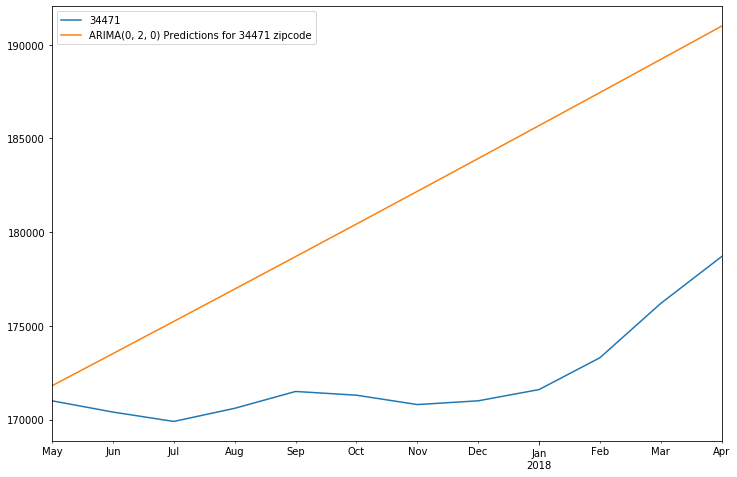

<Figure size 1008x360 with 0 Axes>

In [142]:
ax = test_data['34471'].plot(legend = True, figsize = (12,8))
predictions_71.plot(legend = True)
fig = plt.figure()
ax.legend(loc='best')

In [143]:
model_72 = ARIMA(train_data['34472'], order = (0, 2, 0))

In [144]:
results_72 = model_72.fit()
results_72.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.34472   No. Observations:                  251
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -1829.948
Method:                           css   S.D. of innovations            354.848
Date:                Thu, 04 Mar 2021   AIC                           3663.895
Time:                        20:53:59   BIC                           3670.946
Sample:                    06-01-1996   HQIC                          3666.733
                         - 04-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3825     22.398      0.196      0.845     -39.516      48.281
==============================================================================
"""

In [145]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_72 = results_72.predict(start=start, end=end, dynamic=False, 
                                    typ='levels').rename('ARIMA(0, 2, 0) Predictions for 34472 zipcode')

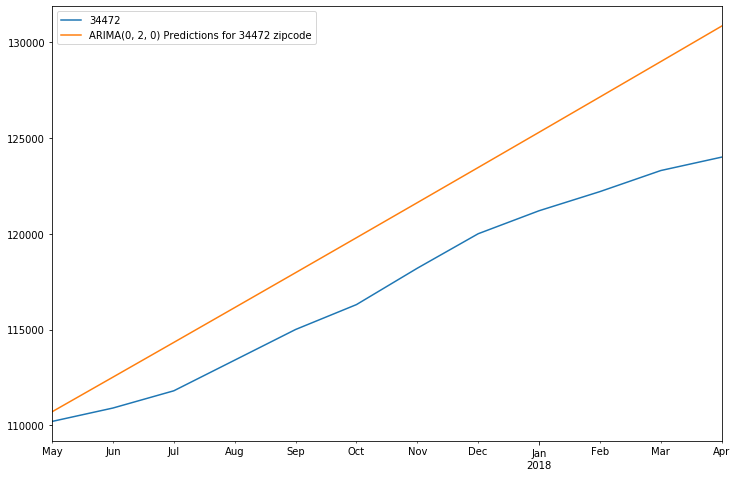

<Figure size 1008x360 with 0 Axes>

In [146]:
ax = test_data['34472'].plot(legend = True, figsize = (12,8))
predictions_72.plot(legend = True)
fig = plt.figure()
ax.legend(loc='best')

#### 34474_Order 0-2-0

In [147]:
model_74 = ARIMA(train_data['34474'], order = (0, 2, 0))

In [148]:
results_74 = model_74.fit()
results_74.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.34474   No. Observations:                  251
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -1959.422
Method:                           css   S.D. of innovations            594.383
Date:                Thu, 04 Mar 2021   AIC                           3922.844
Time:                        20:54:00   BIC                           3929.895
Sample:                    06-01-1996   HQIC                          3925.681
                         - 04-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9841     37.517      0.106      0.915     -69.548      77.516
==============================================================================
"""

In [149]:
AIC74=results_74.aic

In [150]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_74 = results_74.predict(start=start, end=end, dynamic=False, 
                                    typ='levels').rename('ARIMA(0, 2, 0) Predictions for 34474 zipcode')

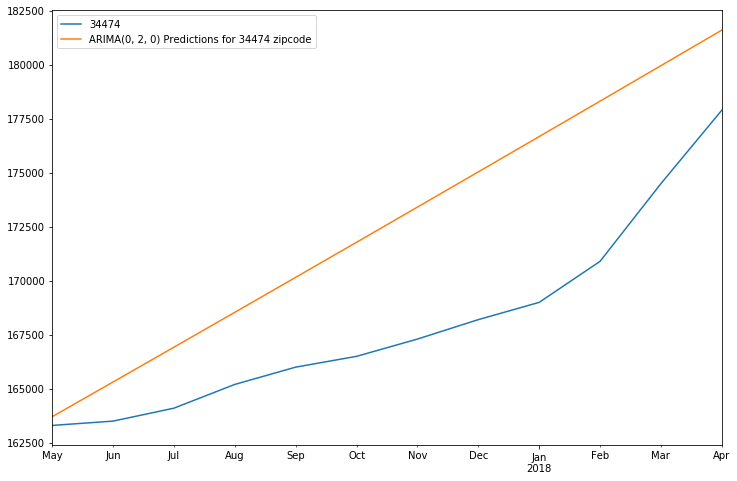

<Figure size 1008x360 with 0 Axes>

In [151]:
ax = test_data['34474'].plot(legend = True, figsize = (12,8))
predictions_74.plot(legend = True)
fig = plt.figure()
ax.legend(loc='best')

#### 34476_Order 0-2-0

In [152]:
model_76 = ARIMA(train_data['34476'], order = (0, 2, 0))

In [153]:
results_76 = model_76.fit()
results_76.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.34476   No. Observations:                  251
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -1844.456
Method:                           css   S.D. of innovations            375.964
Date:                Thu, 04 Mar 2021   AIC                           3692.913
Time:                        20:54:01   BIC                           3699.964
Sample:                    06-01-1996   HQIC                          3695.750
                         - 04-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3904     23.731      0.101      0.920     -44.121      48.902
==============================================================================
"""

In [154]:
AIC76=results_76.aic

In [155]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_76 = results_76.predict(start=start, end=end, dynamic=False, 
                                    typ='levels').rename('ARIMA(0, 2, 0) Predictions for 34476 zipcode')

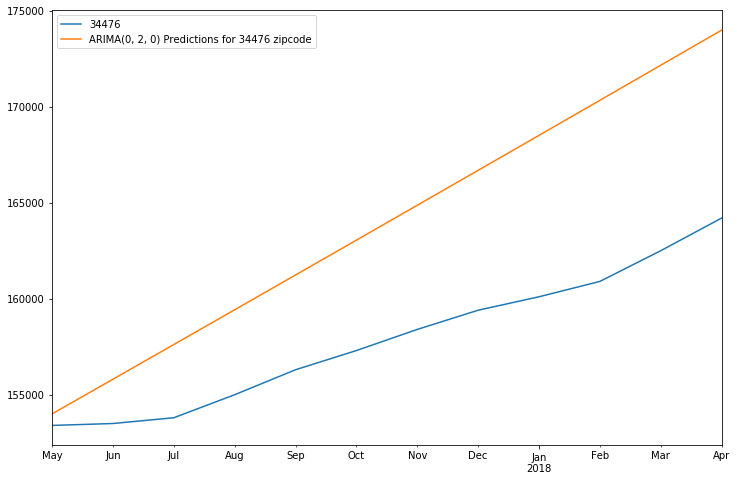

<Figure size 1008x360 with 0 Axes>

In [156]:
ax = test_data['34476'].plot(legend = True, figsize = (12,8))
predictions_76.plot(legend = True)
fig = plt.figure()
ax.legend(loc='best')

#### 34480_Order 0-2-0

In [157]:
model_80 = ARIMA(train_data['34480'], order = (0, 2, 0))

In [158]:
results_80 = model_80.fit()
results_80.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.34480   No. Observations:                  251
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -1843.225
Method:                           css   S.D. of innovations            374.124
Date:                Thu, 04 Mar 2021   AIC                           3690.450
Time:                        20:54:02   BIC                           3697.501
Sample:                    06-01-1996   HQIC                          3693.288
                         - 04-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5777     23.615      0.236      0.813     -40.706      51.861
==============================================================================
"""

In [159]:
AIC80=results_80.aic

In [160]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_80 = results_80.predict(start=start, end=end, dynamic=False, 
                                    typ='levels').rename('ARIMA(0, 2, 0) Predictions for 34480 zipcode')

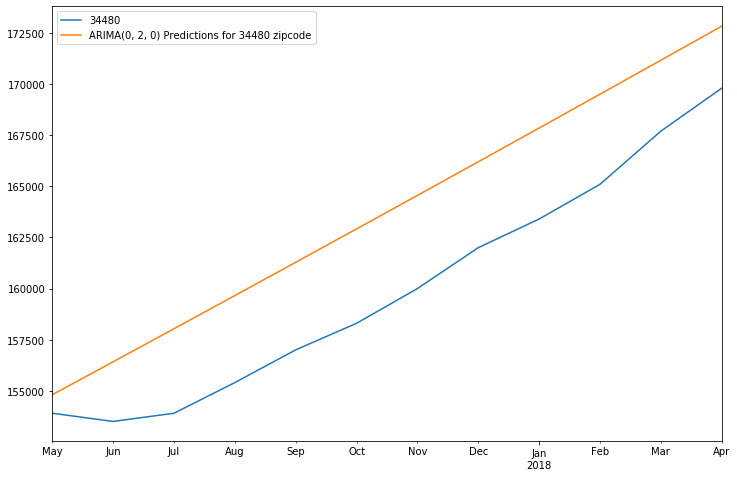

<Figure size 1008x360 with 0 Axes>

In [161]:
ax = test_data['34480'].plot(legend = True, figsize = (12,8))
predictions_80.plot(legend = True)
fig = plt.figure()
ax.legend(loc='best')

#### 34482_Order 0-2-0

In [162]:
model_82 = ARIMA(train_data['34482'], order = (0, 2, 0))

In [163]:
results_82 = model_82.fit()
results_82.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.34482   No. Observations:                  251
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -1859.824
Method:                           css   S.D. of innovations            399.701
Date:                Thu, 04 Mar 2021   AIC                           3723.647
Time:                        20:54:03   BIC                           3730.698
Sample:                    06-01-1996   HQIC                          3726.485
                         - 04-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.443e-15     25.229   5.72e-17      1.000     -49.448      49.448
==============================================================================
"""

In [164]:
AIC82=results_82.aic

In [165]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_82 = results_82.predict(start=start, end=end, dynamic=False, 
                                    typ='levels').rename('ARIMA(0, 2, 0) Predictions for 34482 zipcode')

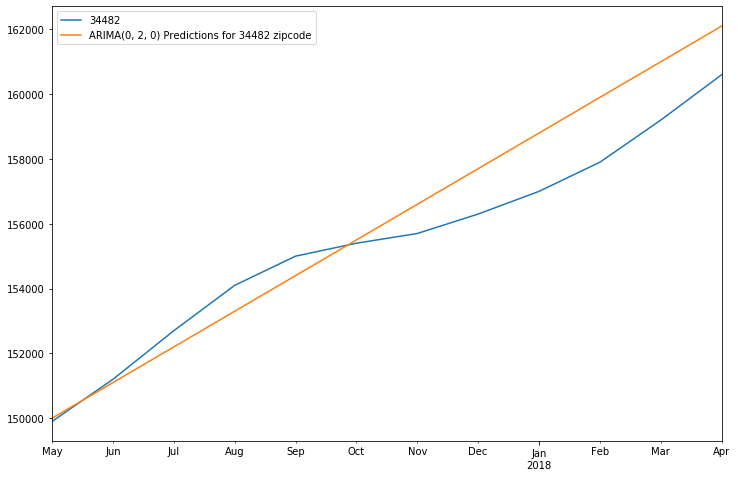

<Figure size 1008x360 with 0 Axes>

In [166]:
ax = test_data['34482'].plot(legend = True, figsize = (12,8))
predictions_82.plot(legend = True)
fig = plt.figure() 
ax.legend(loc='best')

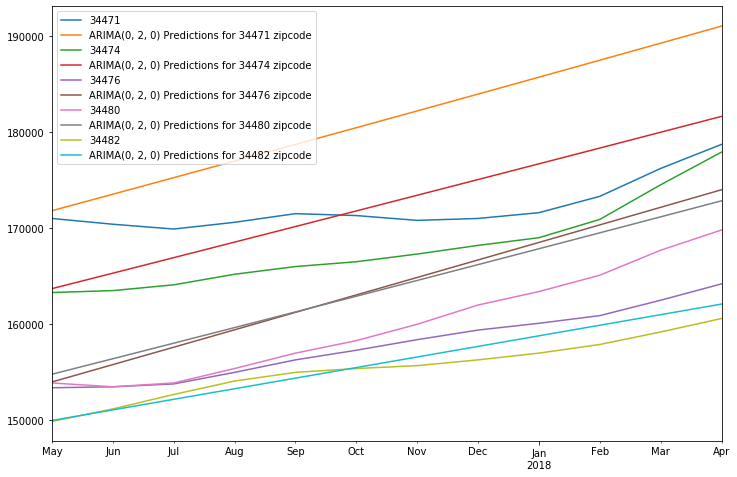

<Figure size 1008x360 with 0 Axes>

In [167]:
test_data['34471'].plot(legend = True, figsize = (12,8))
predictions_71.plot(legend = True)
test_data['34474'].plot(legend = True, figsize = (12,8))
predictions_74.plot(legend = True) 
test_data['34476'].plot(legend = True, figsize = (12,8))
predictions_76.plot(legend = True)
test_data['34480'].plot(legend = True, figsize = (12,8))
predictions_80.plot(legend = True)
test_data['34482'].plot(legend = True, figsize = (12,8))
predictions_82.plot(legend = True)
fig = plt.figure()
ax.legend(loc='best')

In [168]:
print (AIC71)
print (AIC74) 
print (AIC76) 
print (AIC80)
print (AIC82) 

3742.8587880168147
3922.8439598143887
3692.912717746953
3690.450183677515
3723.647065908144


#### 34471_Order 3-2-2 
- without constant = simple exponential smoothing

In [169]:
model_71a = ARIMA(train_data['34471'], order = (3, 2, 2))

In [170]:
results_71a = model_71a.fit()
results_71a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.34471   No. Observations:                  251
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1809.744
Method:                       css-mle   S.D. of innovations            326.853
Date:                Thu, 04 Mar 2021   AIC                           3633.488
Time:                        20:54:06   BIC                           3658.166
Sample:                    06-01-1996   HQIC                          3643.419
                         - 04-01-2017                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.0609     35.098      0.144      0.885     -63.730      73.852
ar.L1.D2.34471    -0.4425      0.270     -1.637      0.102      -0.972       0.087
ar.L2.D2.34471    -0.1940      0.104     -1.869      0.062      -0.398       0.009
ar.L3.D2.34471     0.0200      0.100      0.201      0.841      -0.175       0.215
ma.L1.D2.34471     1.2100      0.263      4.597      0.000       0.694       1.726
ma.L2.D2.34471     0.5439      0.164      3.311      0.001       0.222       0.866
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1050           -1.7256j            2.0491           -0.3406
AR.2           -1.1050           +1.7256j            2.0491            0.3406
AR.3           11.9262           -0.0000j           11.9262           -0.0000
MA.1           -1.1123           -0.7754j            1.3559           -0.4031
MA.2           -1.1123           +0.7754j            1.3559            0.4031
-----------------------------------------------------------------------------
"""

In [171]:
AIC71a=results_71a.aic

In [172]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_71a = results_71a.predict(start=start, end=end, dynamic=False, 
                                    typ='levels').rename('ARIMA(3, 2, 2) Predictions for 34471 zipcode')

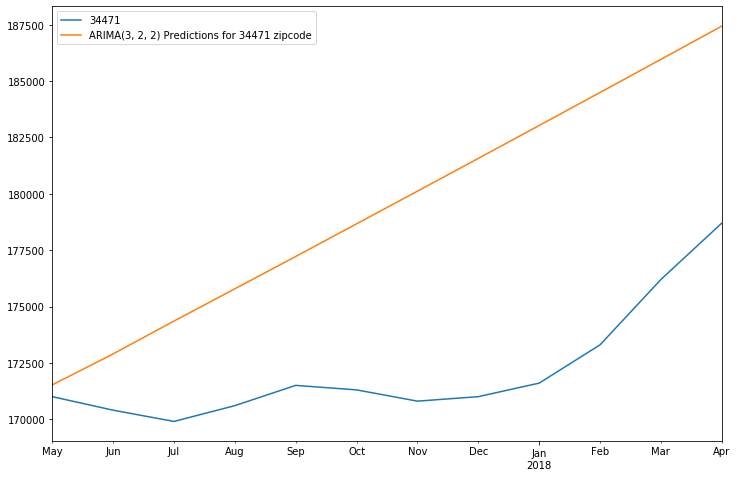

<Figure size 1008x360 with 0 Axes>

In [173]:
ax = test_data['34471'].plot(legend = True, figsize = (12,8))
predictions_71a.plot(legend = True)
fig = plt.figure() 
ax.legend(loc='best')

#### 34474_Order 3-2-2 
- without constant = simple exponential smoothing

In [174]:
model_74a = ARIMA(train_data['34474'], order = (3, 2, 2))

In [175]:
results_74a = model_74a.fit()
results_74a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.34474   No. Observations:                  251
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1877.494
Method:                       css-mle   S.D. of innovations            427.299
Date:                Thu, 04 Mar 2021   AIC                           3768.987
Time:                        20:54:07   BIC                           3793.665
Sample:                    06-01-1996   HQIC                          3778.918
                         - 04-01-2017                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.3336     63.404      0.100      0.920    -117.935     130.602
ar.L1.D2.34474     0.1769      0.090      1.955      0.051      -0.000       0.354
ar.L2.D2.34474    -0.6659      0.046    -14.503      0.000      -0.756      -0.576
ar.L3.D2.34474     0.4651      0.064      7.248      0.000       0.339       0.591
ma.L1.D2.34474     0.6460      0.065      9.865      0.000       0.518       0.774
ma.L2.D2.34474     0.7717      0.111      6.981      0.000       0.555       0.988
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2105           -1.0564j            1.0772           -0.2813
AR.2           -0.2105           +1.0564j            1.0772            0.2813
AR.3            1.8527           -0.0000j            1.8527           -0.0000
MA.1           -0.4186           -1.0586j            1.1383           -0.3099
MA.2           -0.4186           +1.0586j            1.1383            0.3099
-----------------------------------------------------------------------------
"""

In [176]:
AIC74a=results_74a.aic

In [177]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_74a = results_74a.predict(start=start, end=end, dynamic=False, 
                                    typ='levels').rename('ARIMA(3, 2, 2) Predictions for 34474 zipcode')

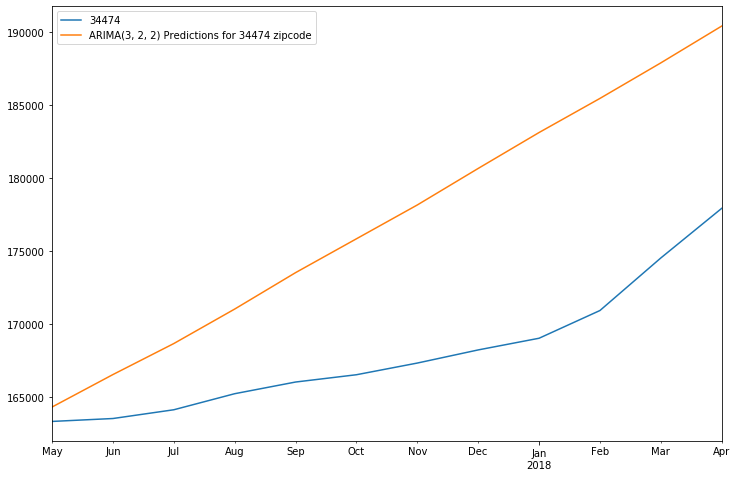

<Figure size 1008x360 with 0 Axes>

In [178]:
ax = test_data['34474'].plot(legend = True, figsize = (12,8))
predictions_74a.plot(legend = True)
fig = plt.figure() 
ax.legend(loc='best')

#### 34476_Order 3-2-2 
- without constant = simple exponential smoothing

In [179]:
model_76a = ARIMA(train_data['34476'], order = (3, 2, 2))

In [180]:
results_76a = model_76a.fit()
results_76a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.34476   No. Observations:                  251
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1770.847
Method:                       css-mle   S.D. of innovations            279.886
Date:                Thu, 04 Mar 2021   AIC                           3555.695
Time:                        20:54:09   BIC                           3580.373
Sample:                    06-01-1996   HQIC                          3565.626
                         - 04-01-2017                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.7057     40.634      0.091      0.927     -75.935      83.347
ar.L1.D2.34476     0.2203      0.239      0.922      0.356      -0.248       0.689
ar.L2.D2.34476    -0.3135      0.131     -2.399      0.016      -0.570      -0.057
ar.L3.D2.34476     0.2613      0.103      2.532      0.011       0.059       0.464
ma.L1.D2.34476     0.6351      0.237      2.676      0.007       0.170       1.100
ma.L2.D2.34476     0.2865      0.191      1.498      0.134      -0.088       0.661
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.3282           -1.3978j            1.4358           -0.2867
AR.2           -0.3282           +1.3978j            1.4358            0.2867
AR.3            1.8562           -0.0000j            1.8562           -0.0000
MA.1           -1.1085           -1.5041j            1.8684           -0.3511
MA.2           -1.1085           +1.5041j            1.8684            0.3511
-----------------------------------------------------------------------------
"""

In [181]:
AIC76a=results_76a.aic

In [182]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_76a = results_76a.predict(start=start, end=end, dynamic=False, 
                                    typ='levels').rename('ARIMA(3, 2, 2) Predictions for 34476 zipcode')

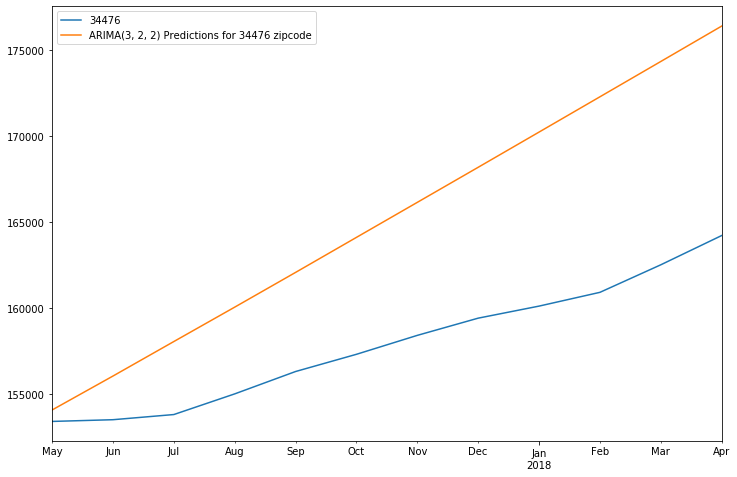

<Figure size 1008x360 with 0 Axes>

In [183]:
ax = test_data['34476'].plot(legend = True, figsize = (12,8))
predictions_76a.plot(legend = True)
fig = plt.figure() 
ax.legend(loc='best')

#### 34480_Order 3-2-2 
- without constant = simple exponential smoothing

In [184]:
model_80a = ARIMA(train_data['34480'], order = (3, 2, 2))

In [185]:
results_80a = model_80a.fit()
results_80a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.34480   No. Observations:                  251
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1774.474
Method:                       css-mle   S.D. of innovations            283.725
Date:                Thu, 04 Mar 2021   AIC                           3562.947
Time:                        20:54:10   BIC                           3587.625
Sample:                    06-01-1996   HQIC                          3572.878
                         - 04-01-2017                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.0226     39.867      0.101      0.920     -74.116      82.161
ar.L1.D2.34480    -0.0449      0.126     -0.356      0.722      -0.293       0.203
ar.L2.D2.34480    -0.5297      0.067     -7.906      0.000      -0.661      -0.398
ar.L3.D2.34480     0.4268      0.084      5.090      0.000       0.262       0.591
ma.L1.D2.34480     0.8101      0.132      6.158      0.000       0.552       1.068
ma.L2.D2.34480     0.7558      0.068     11.149      0.000       0.623       0.889
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.3429           -1.0481j            1.1027           -0.3003
AR.2           -0.3429           +1.0481j            1.1027            0.3003
AR.3            1.9269           -0.0000j            1.9269           -0.0000
MA.1           -0.5360           -1.0178j            1.1503           -0.3271
MA.2           -0.5360           +1.0178j            1.1503            0.3271
-----------------------------------------------------------------------------
"""

In [186]:
AIC80a=results_80a.aic

In [187]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_80a = results_80a.predict(start=start, end=end, dynamic=False, 
                                    typ='levels').rename('ARIMA(3, 2, 2) Predictions for 34480 zipcode')

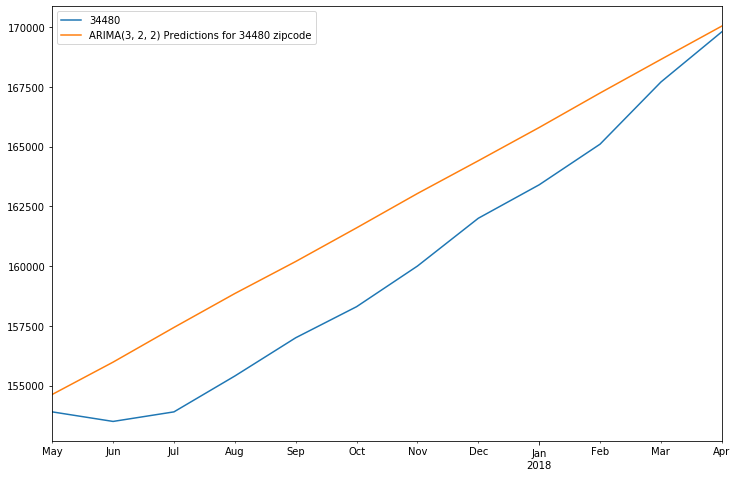

<Figure size 1008x360 with 0 Axes>

In [188]:
ax = test_data['34480'].plot(legend = True, figsize = (12,8))
predictions_80a.plot(legend = True)
fig = plt.figure() 
ax.legend(loc='best')

#### 34482_Order 3-2-2 
- without constant = simple exponential smoothing

In [189]:
model_82a = ARIMA(train_data['34482'], order = (3, 2, 2))

In [190]:
results_82a = model_82a.fit()
results_82a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.34482   No. Observations:                  251
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1807.962
Method:                       css-mle   S.D. of innovations            324.375
Date:                Thu, 04 Mar 2021   AIC                           3629.923
Time:                        20:54:12   BIC                           3654.601
Sample:                    06-01-1996   HQIC                          3639.854
                         - 04-01-2017                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.3684     31.641     -0.043      0.966     -63.384      60.647
ar.L1.D2.34482    -0.7811      0.110     -7.127      0.000      -0.996      -0.566
ar.L2.D2.34482    -0.2397      0.091     -2.628      0.009      -0.418      -0.061
ar.L3.D2.34482    -0.0498      0.079     -0.626      0.531      -0.206       0.106
ma.L1.D2.34482     1.4638      0.092     15.938      0.000       1.284       1.644
ma.L2.D2.34482     0.7388      0.062     11.953      0.000       0.618       0.860
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9957           -0.0000j            1.9957           -0.5000
AR.2           -1.4091           -2.8424j            3.1725           -0.3233
AR.3           -1.4091           +2.8424j            3.1725            0.3233
MA.1           -0.9906           -0.6100j            1.1634           -0.4122
MA.2           -0.9906           +0.6100j            1.1634            0.4122
-----------------------------------------------------------------------------
"""

In [191]:
AIC82a=results_82a.aic

In [192]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_82a = results_82a.predict(start=start, end=end, dynamic=False, 
                                    typ='levels').rename('ARIMA(3, 2, 2) Predictions for 34482 zipcode')

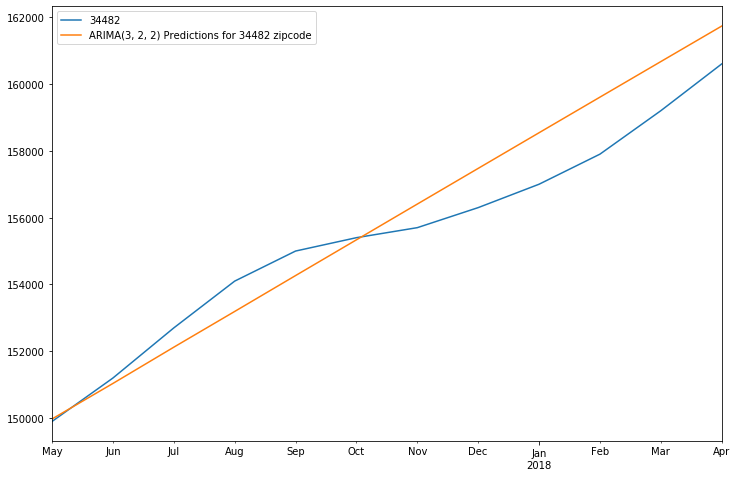

<Figure size 1008x360 with 0 Axes>

In [193]:
ax = test_data['34482'].plot(legend = True, figsize = (12,8))
predictions_82a.plot(legend = True)
fig = plt.figure() 
ax.legend(loc='best')

#### 34471_order 1-1-1

In [194]:
model_71b = ARIMA(train_data['34471'], order = (1,1,1))

In [195]:
results_71b = model_71b.fit()
results_71b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.34471   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1821.324
Method:                       css-mle   S.D. of innovations            330.617
Date:                Thu, 04 Mar 2021   AIC                           3650.648
Time:                        20:54:13   BIC                           3664.765
Sample:                    05-01-1996   HQIC                          3656.328
                         - 04-01-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           405.3156    590.545      0.686      0.492    -752.131    1562.762
ar.L1.D.34471     0.9447      0.020     48.010      0.000       0.906       0.983
ma.L1.D.34471     0.6733      0.039     17.320      0.000       0.597       0.750
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0586           +0.0000j            1.0586            0.0000
MA.1           -1.4852           +0.0000j            1.4852            0.5000
-----------------------------------------------------------------------------
"""

In [196]:
AIC71b=results_71b.aic

In [197]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_71b = results_71b.predict(start=start, end=end, dynamic=False, 
                                    typ='levels').rename('ARIMA(1, 1, 1) Predictions for 34471 zipcode')

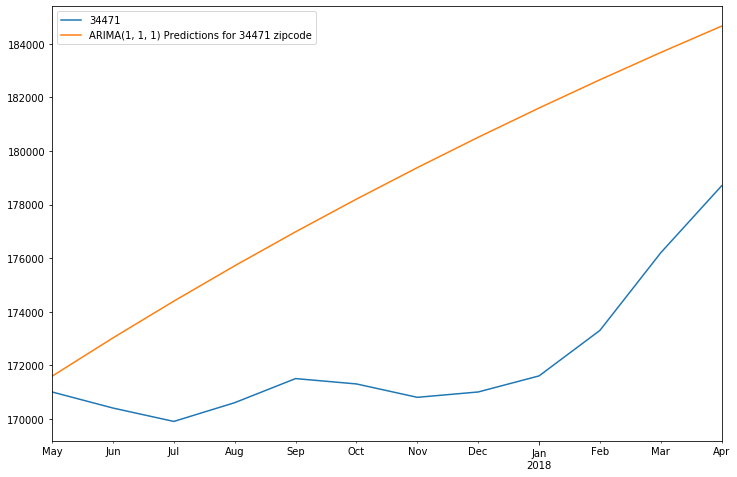

<Figure size 1008x360 with 0 Axes>

In [198]:
ax = test_data['34471'].plot(legend = True, figsize = (12,8))
predictions_71b.plot(legend = True)
fig = plt.figure() 
ax.legend(loc='best')

#### 34474_order 1-1-1

In [199]:
model_74b = ARIMA(train_data['34474'], order = (1,1,1))

In [200]:
results_74b = model_74b.fit()
results_74b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.34474   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1901.661
Method:                       css-mle   S.D. of innovations            455.067
Date:                Thu, 04 Mar 2021   AIC                           3811.323
Time:                        20:54:14   BIC                           3825.440
Sample:                    05-01-1996   HQIC                          3817.003
                         - 04-01-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           416.2381    579.050      0.719      0.472    -718.679    1551.155
ar.L1.D.34474     0.9204      0.024     38.511      0.000       0.874       0.967
ma.L1.D.34474     0.6805      0.035     19.586      0.000       0.612       0.749
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0864           +0.0000j            1.0864            0.0000
MA.1           -1.4696           +0.0000j            1.4696            0.5000
-----------------------------------------------------------------------------
"""

In [201]:
AIC74b=results_74b.aic

In [202]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_74b = results_74b.predict(start=start, end=end, dynamic=False, 
                                    typ='levels').rename('ARIMA(1, 1, 1) Predictions for 34474 zipcode')

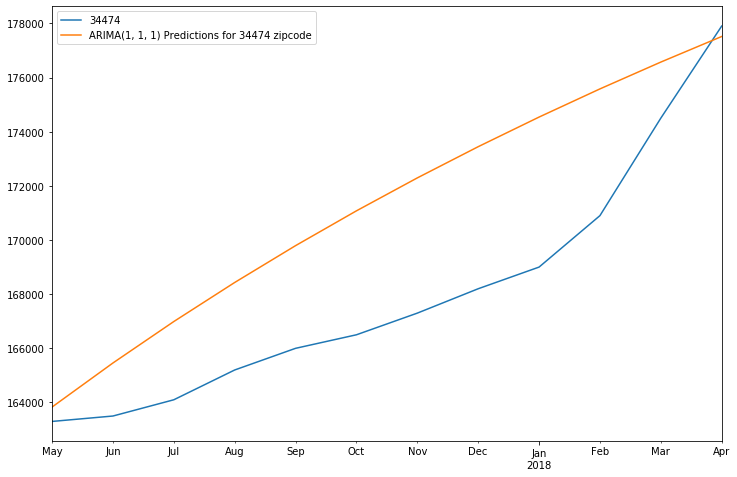

<Figure size 1008x360 with 0 Axes>

In [203]:
ax = test_data['34474'].plot(legend = True, figsize = (12,8))
predictions_74b.plot(legend = True)
fig = plt.figure() 
ax.legend(loc='best')

#### 34476_order 1-1-1

In [204]:
model_76b = ARIMA(train_data['34476'], order = (1,1,1))

In [205]:
results_76b = model_76b.fit()
results_76b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.34476   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1783.332
Method:                       css-mle   S.D. of innovations            283.979
Date:                Thu, 04 Mar 2021   AIC                           3574.665
Time:                        20:54:16   BIC                           3588.783
Sample:                    05-01-1996   HQIC                          3580.345
                         - 04-01-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           502.6858    748.952      0.671      0.502    -965.234    1970.605
ar.L1.D.34476     0.9619      0.016     59.941      0.000       0.930       0.993
ma.L1.D.34476     0.7424      0.038     19.294      0.000       0.667       0.818
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0396           +0.0000j            1.0396            0.0000
MA.1           -1.3469           +0.0000j            1.3469            0.5000
-----------------------------------------------------------------------------
"""

In [206]:
AIC76b=results_76b.aic

In [207]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_76b = results_76b.predict(start=start, end=end, dynamic=False, 
                                    typ='levels').rename('ARIMA(1, 1, 1) Predictions for 34476 zipcode')

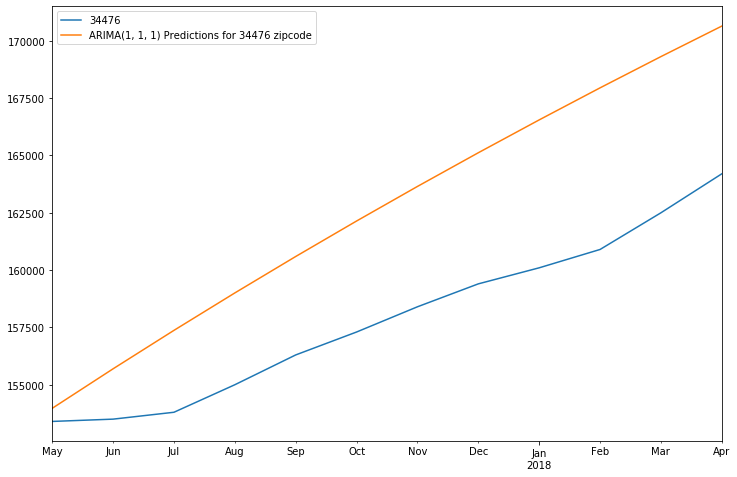

<Figure size 1008x360 with 0 Axes>

In [208]:
ax = test_data['34476'].plot(legend = True, figsize = (12,8))
predictions_76b.plot(legend = True)
fig = plt.figure() 
ax.legend(loc='best')

#### 34480_order 1-1-1

In [209]:
model_80b = ARIMA(train_data['34480'], order = (1,1,1))

In [210]:
results_80b = model_80b.fit()
results_80b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.34480   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1802.117
Method:                       css-mle   S.D. of innovations            306.356
Date:                Thu, 04 Mar 2021   AIC                           3612.234
Time:                        20:54:17   BIC                           3626.351
Sample:                    05-01-1996   HQIC                          3617.914
                         - 04-01-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           384.7599    669.979      0.574      0.566    -928.375    1697.895
ar.L1.D.34480     0.9579      0.017     56.640      0.000       0.925       0.991
ma.L1.D.34480     0.5887      0.042     13.978      0.000       0.506       0.671
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0440           +0.0000j            1.0440            0.0000
MA.1           -1.6986           +0.0000j            1.6986            0.5000
-----------------------------------------------------------------------------
"""

In [211]:
AIC80b=results_80b.aic

In [212]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_80b = results_80b.predict(start=start, end=end, dynamic=False, 
                                    typ='levels').rename('ARIMA(1, 1, 1) Predictions for 34480 zipcode')

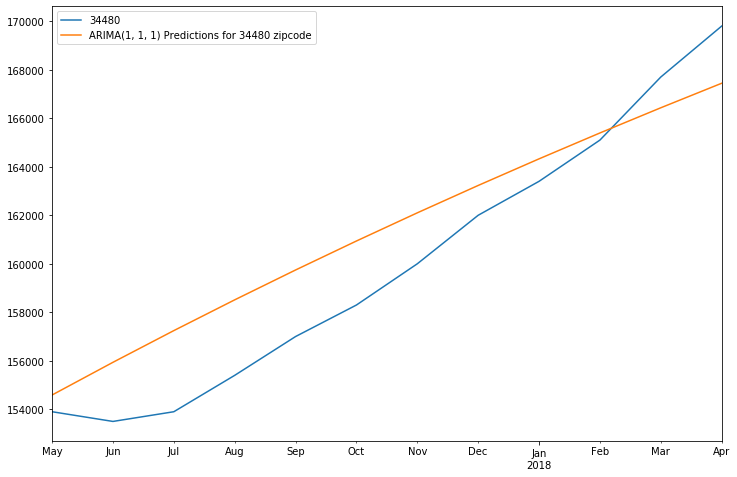

<Figure size 1008x360 with 0 Axes>

In [213]:
ax = test_data['34480'].plot(legend = True, figsize = (12,8))
predictions_80b.plot(legend = True)
fig = plt.figure() 
ax.legend(loc='best') 

#### 34482_order 1-1-1

In [214]:
model_82b = ARIMA(train_data['34482'], order = (1,1,1))

In [215]:
results_82b = model_82b.fit()
results_82b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.34482   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1828.929
Method:                       css-mle   S.D. of innovations            340.932
Date:                Thu, 04 Mar 2021   AIC                           3665.858
Time:                        20:54:18   BIC                           3679.975
Sample:                    05-01-1996   HQIC                          3671.538
                         - 04-01-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           435.4079    626.149      0.695      0.487    -791.821    1662.636
ar.L1.D.34482     0.9503      0.019     51.155      0.000       0.914       0.987
ma.L1.D.34482     0.5532      0.043     12.843      0.000       0.469       0.638
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0523           +0.0000j            1.0523            0.0000
MA.1           -1.8078           +0.0000j            1.8078            0.5000
-----------------------------------------------------------------------------
"""

In [216]:
AIC82b=results_82b.aic

In [217]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_82b = results_82b.predict(start=start, end=end, dynamic=False, 
                                    typ='levels').rename('ARIMA(1, 1, 1) Predictions for 34482 zipcode')

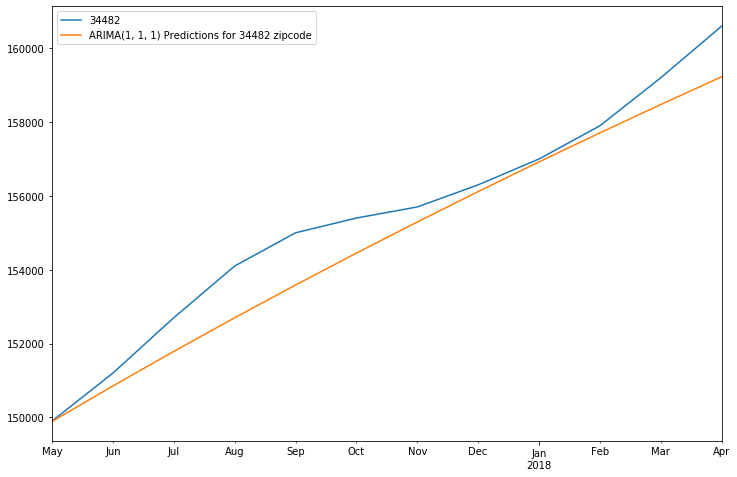

<Figure size 1008x360 with 0 Axes>

In [218]:
ax = test_data['34482'].plot(legend = True, figsize = (12,8))
predictions_82b.plot(legend = True)
fig = plt.figure() 
ax.legend(loc='best') 

In [219]:
print(f'{AIC71} = AIC71') 
print(f'{AIC71a} = AIC71a') 
print(f'{AIC71b} = AIC71b') 
print(f'{AIC74} = AIC74') 
print(f'{AIC74a} = AIC74a')
print(f'{AIC74b} = AIC74b') 
print(f'{AIC76} = AIC76') 
print(f'{AIC76a} = AIC76a') 
print(f'{AIC76b} = AIC76b') 
print(f'{AIC80} = AIC80') 
print(f'{AIC80a} = AIC80a') 
print(f'{AIC80b} = AIC80b') 
print(f'{AIC82} = AIC82') 
print(f'{AIC82a} = AIC82a') 
print(f'{AIC82b} = AIC82b') 

3742.8587880168147 = AIC71
3633.4880300660575 = AIC71a
3650.647671639182 = AIC71b
3922.8439598143887 = AIC74
3768.9871270889453 = AIC74a
3811.322639426027 = AIC74b
3692.912717746953 = AIC76
3555.694891459304 = AIC76a
3574.6647993754445 = AIC76b
3690.450183677515 = AIC80
3562.94723433627 = AIC80a
3612.233774858934 = AIC80b
3723.647065908144 = AIC82
3629.9230140328727 = AIC82a
3665.857779903876 = AIC82b
